In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata
import scipy
import os

import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
import session_info
session_info.show()

In [3]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [4]:
sc.settings.set_figure_params(dpi=300,dpi_save=300)

# Functions

# Variables

In [5]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'
outdir = '/nfs/team205/heart/anndata_objects/Foetal/Immune/MoMP_Aug2023/seg_3-4-5-6-7-8-9'
os.listdir(outdir)

['adata.h5ad', 'differential-test_result.pkl', 'fitting_result.pkl']

# Read in anndata object

In [6]:
adata = sc.read_h5ad(f'{outdir}/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 3886 × 142283
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'adata_auc_gene', 'adata_auc_region', 'adata_gex', 'adata_gex_lognorm', 'adata_peak_tfidf', 'dr

In [7]:
# scale t
# min-max scaling
adata.obs['t_scaled'] = (adata.obs['t']-adata.obs['t'].min())/(adata.obs['t'].max()-adata.obs['t'].min())

In [8]:
# summarise gene expression
adata_gex = adata.uns['adata_gex_lognorm'].copy()
print(adata_gex.X.data[:10])

# scale t
# min-max scaling
adata_gex.obs['t_scaled'] = (adata_gex.obs['t']-adata_gex.obs['t'].min())/(adata_gex.obs['t'].max()-adata_gex.obs['t'].min())

[1.0841573 2.6877544 1.0841573 2.1779046 1.0841573 2.1779046 1.0841573
 1.0841573 2.9238348 2.3781319]


In [9]:
group_mean_exp = utils.grouped_obs_mean(adata_gex, group_key='milestones')
group_mean_exp

16        20        28        29        32        44  \
FUT8-AS1    0.000000  0.008082  0.003232  0.005872  0.006991  0.000000   
FUT8        0.047887  0.113860  0.108392  0.330877  0.170878  0.132483   
AL139022.1  0.000000  0.011640  0.006983  0.003869  0.018432  0.022290   
MAX         0.305365  0.509942  0.473642  0.387269  0.522899  0.641576   
FNTB        0.196388  0.110812  0.117229  0.115182  0.142472  0.233849   
...              ...       ...       ...       ...       ...       ...   
SLC17A5     0.114411  0.251397  0.309809  0.246394  0.256153  0.410531   
EEF1A1      3.582258  3.368840  3.538818  3.308759  3.111608  2.281303   
MTO1        0.000000  0.124527  0.096903  0.082445  0.080187  0.091747   
CGAS        0.355698  0.292836  0.234341  0.214558  0.234205  0.162990   
DDX43       0.000000  0.032270  0.022186  0.012495  0.026057  0.013462   

                  47         5  
FUT8-AS1    0.005888  0.007150  
FUT8        0.136239  0.274284  
AL139022.1  0.003632  0.010413  
MAX         0.331677  0.415460  
FNTB        0.091010  0.103246  
...              ...       ...  
SLC17A5     0.198677  0.191004  
EEF1A1      3.517304  3.352933  
MTO1        0.061599  0.074209  
CGAS        0.207860  0.159908  
DDX43       0.019312  0.013056  

[15922 rows x 8 columns]

# Read in pseudotime-fitting output

In [10]:
# read in
fit_res_dict = utils.read_pkl(f'{outdir}/fitting_result.pkl')
fit_res = fit_res_dict['gene'].copy()
fit_res 

modality gene_name_scRNA-0          gene_id  n_cells  \
HSPA1B      Gene Expression            HSPA1B  ENSG00000204388     5273   
HIST1H4C    Gene Expression          HIST1H4C  ENSG00000197061     4061   
HSPA1A      Gene Expression            HSPA1A  ENSG00000204389     5675   
DOCK4       Gene Expression             DOCK4  ENSG00000128512     4529   
RPL41       Gene Expression             RPL41  ENSG00000229117     6567   
...                     ...               ...              ...      ...   
DEFB1       Gene Expression             DEFB1  ENSG00000164825       36   
ADGRG3      Gene Expression            ADGRG3  ENSG00000182885      128   
SERPINB2    Gene Expression          SERPINB2  ENSG00000197632      139   
SERPINB10   Gene Expression         SERPINB10  ENSG00000242550       51   
AC005392.2  Gene Expression        AC005392.2  ENSG00000231412       50   

                    p_val         A            fdr  st  signi  
HSPA1B      1.344984e-122  3.704427  2.141484e-118   1   True  
HIST1H4C    4.862087e-247  3.567995  7.741414e-243   1   True  
HSPA1A      9.659266e-112  3.461835  1.537948e-107   1   True  
DOCK4        2.296005e-93  3.318943   3.655700e-89   1   True  
RPL41        2.765183e-53  3.202231   4.402724e-49   1   True  
...                   ...       ...            ...  ..    ...  
DEFB1        1.000000e+00  0.000000   1.000000e+00   0  False  
ADGRG3       1.000000e+00  0.000000   1.000000e+00   0  False  
SERPINB2     1.000000e+00  0.000000   1.000000e+00   0  False  
SERPINB10    1.000000e+00  0.000000   1.000000e+00   0  False  
AC005392.2   1.000000e+00  0.000000   1.000000e+00   0  False  

[15922 rows x 9 columns]

# Read in differential test output (vs root)

In [11]:
# read in
diff_res_dict = utils.read_pkl(f'{outdir}/differential-test_result.pkl')
diff_res = diff_res_dict['gene'].copy()

# add mean gene expression
df = group_mean_exp.reset_index().melt(id_vars=['index'])
df.rename(columns={'index':'names','variable':'group','value':'mean_gene_exp'},
          inplace=True)
# add
diff_res = diff_res.merge(df, how='left', on=['group','names'])

diff_res

group     names     scores  logfoldchanges         pvals     pvals_adj  \
0         16      PLTP  11.232105        4.156093  3.889661e-10  1.600289e-08   
1         16     F13A1   7.523323        2.416388  1.527438e-07  3.635256e-06   
2         16      CREM   7.467655        1.803025  1.192650e-07  2.930459e-06   
3         16    LILRB5   6.322471        3.573435  5.633352e-06  9.180576e-05   
4         16      PSAP   6.246750        1.261531  2.030142e-06  3.694163e-05   
...      ...       ...        ...             ...           ...           ...   
111449     5      SMC4 -15.020709       -2.545317  1.461924e-37  5.819189e-34   
111450     5     CENPF -15.152248       -3.063090  2.088896e-37  6.651882e-34   
111451     5  HIST1H1D -15.203260       -2.967503  3.294674e-38  1.748593e-34   
111452     5     TOP2A -17.198502       -3.081808  3.622096e-45  2.883551e-41   
111453     5     MKI67 -17.785374       -3.242376  2.242467e-47  3.570456e-43   

        mean_gene_exp  
0            3.041762  
1            3.740165  
2            2.496129  
3            1.700602  
4            2.797548  
...               ...  
111449       0.327771  
111450       0.330728  
111451       0.653809  
111452       0.472510  
111453       0.434173  

[111454 rows x 7 columns]

In [12]:
diff_res[diff_res['names']=='DOCK4']

group  names     scores  logfoldchanges         pvals     pvals_adj  \
1974     16  DOCK4   0.730241        0.551788  4.743745e-01  6.990274e-01   
17783    20  DOCK4   1.427863        0.328878  1.539283e-01  3.448496e-01   
33912    28  DOCK4   2.053811        0.389989  4.062768e-02  1.076688e-01   
47951    32  DOCK4   6.542884        1.346501  1.294995e-10  3.256690e-09   
63713    44  DOCK4  13.500024        2.870239  4.814480e-36  1.179325e-33   
88906    47  DOCK4  -1.372868       -0.284222  1.705389e-01  3.314585e-01   
98061     5  DOCK4   0.761038        0.144106  4.471222e-01  6.900339e-01   

       mean_gene_exp  
1974        1.299879  
17783       1.189905  
33912       1.219565  
47951       1.728065  
63713       2.661109  
88906       0.914316  
98061       1.102562

In [13]:
set(diff_res['group'])

{'16', '20', '28', '32', '44', '47', '5'}

# Select genes

* Significantly upregulated at least one of the non-root milestones
* Significantly fitted

<Axes: xlabel='logfoldchanges', ylabel='scores'>

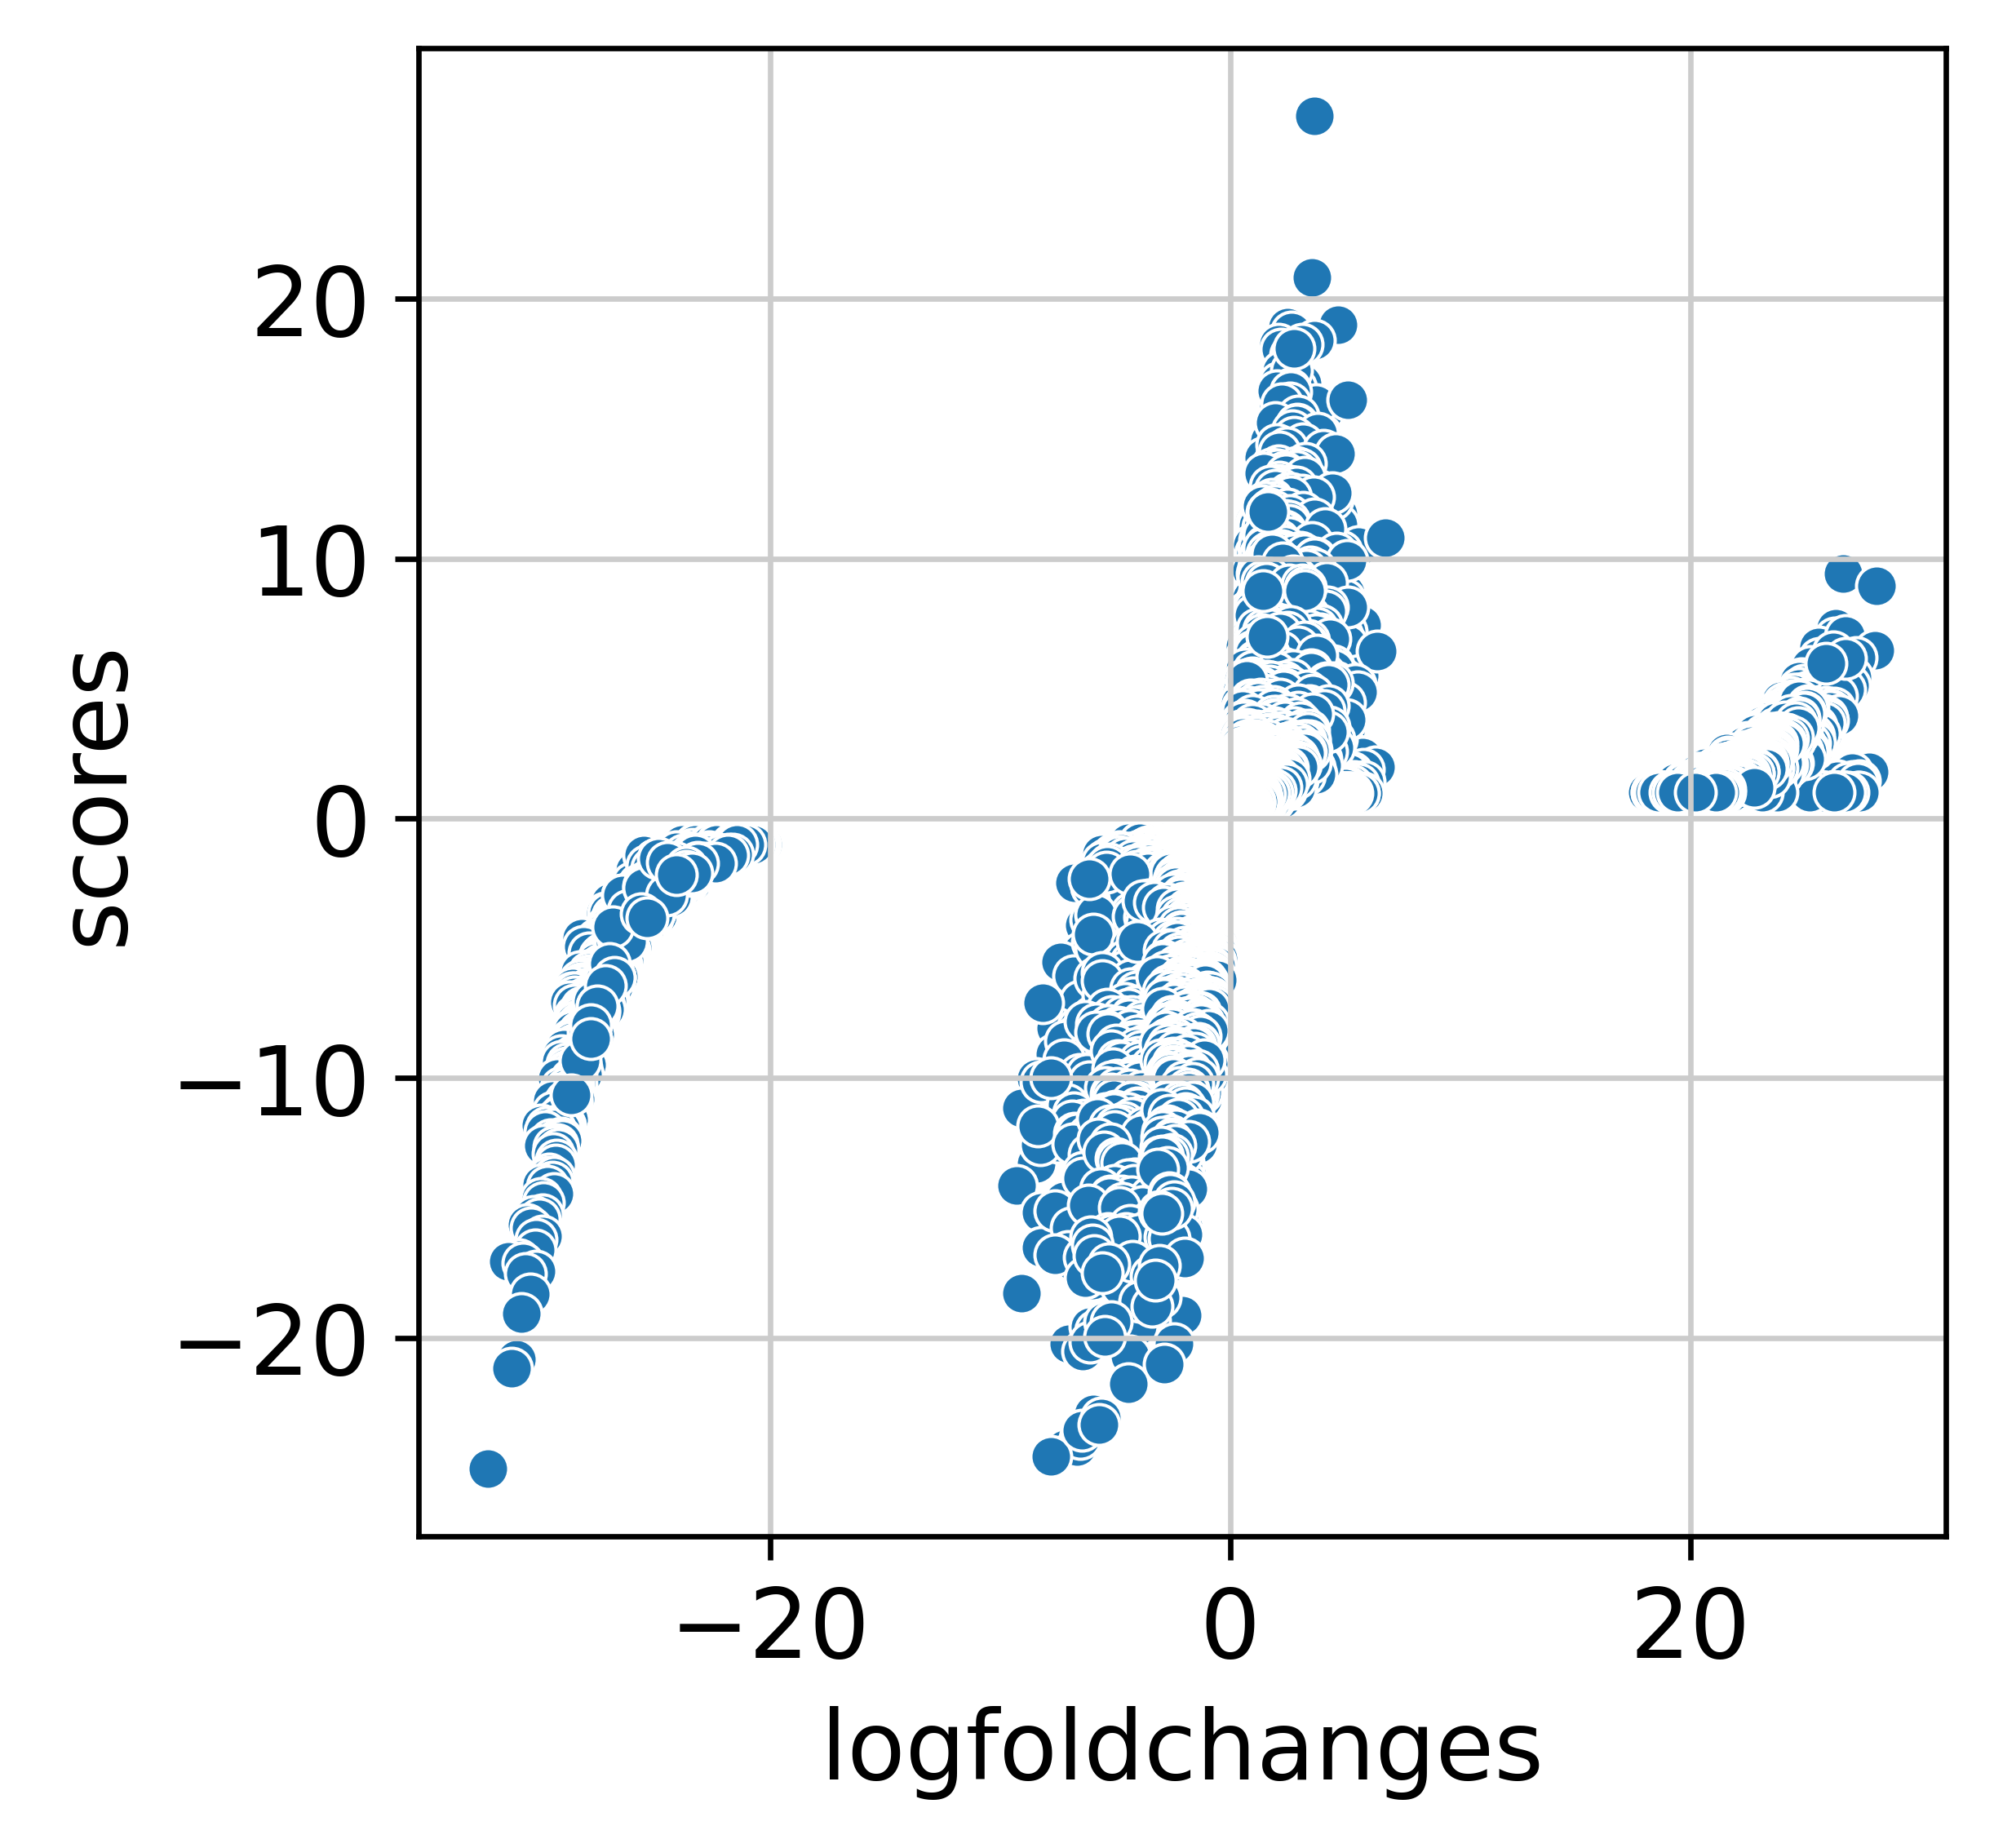

In [14]:
sns.scatterplot(data=diff_res, x='logfoldchanges',y='scores')

<Axes: xlabel='logfoldchanges', ylabel='pvals_adj'>

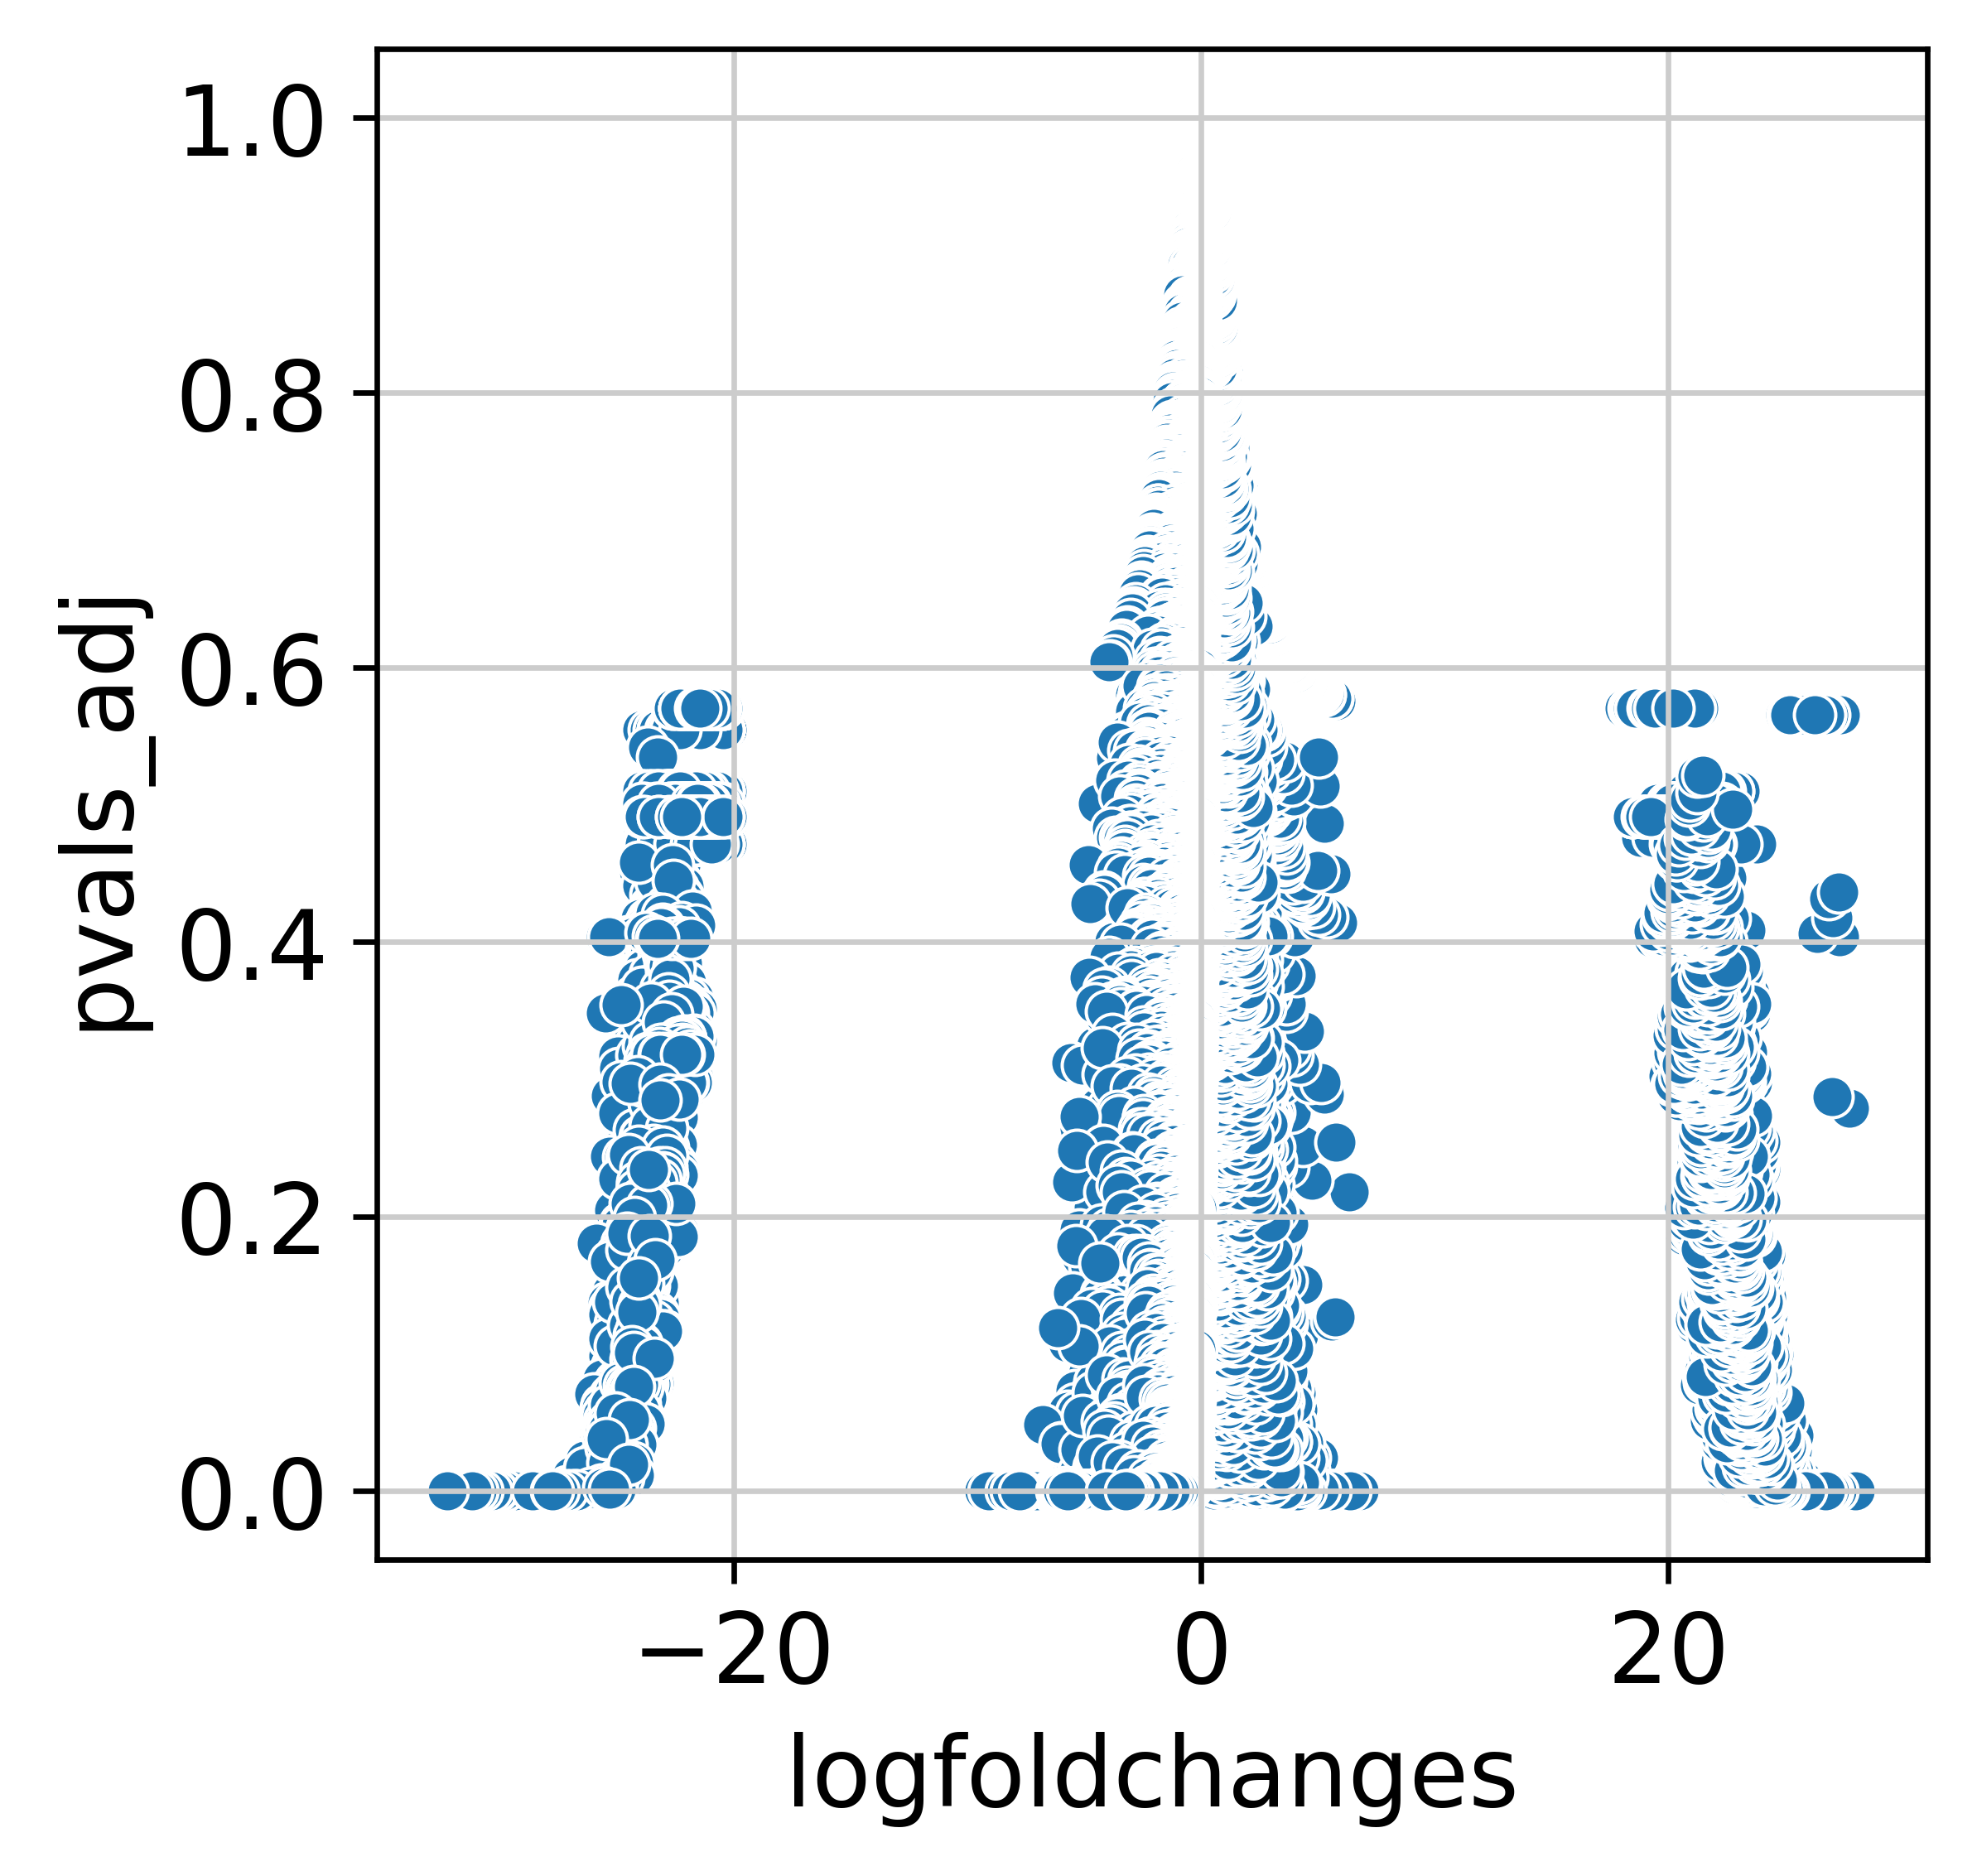

In [15]:
sns.scatterplot(data=diff_res,x='logfoldchanges',y='pvals_adj')

<Axes: xlabel='logfoldchanges', ylabel='mean_gene_exp'>

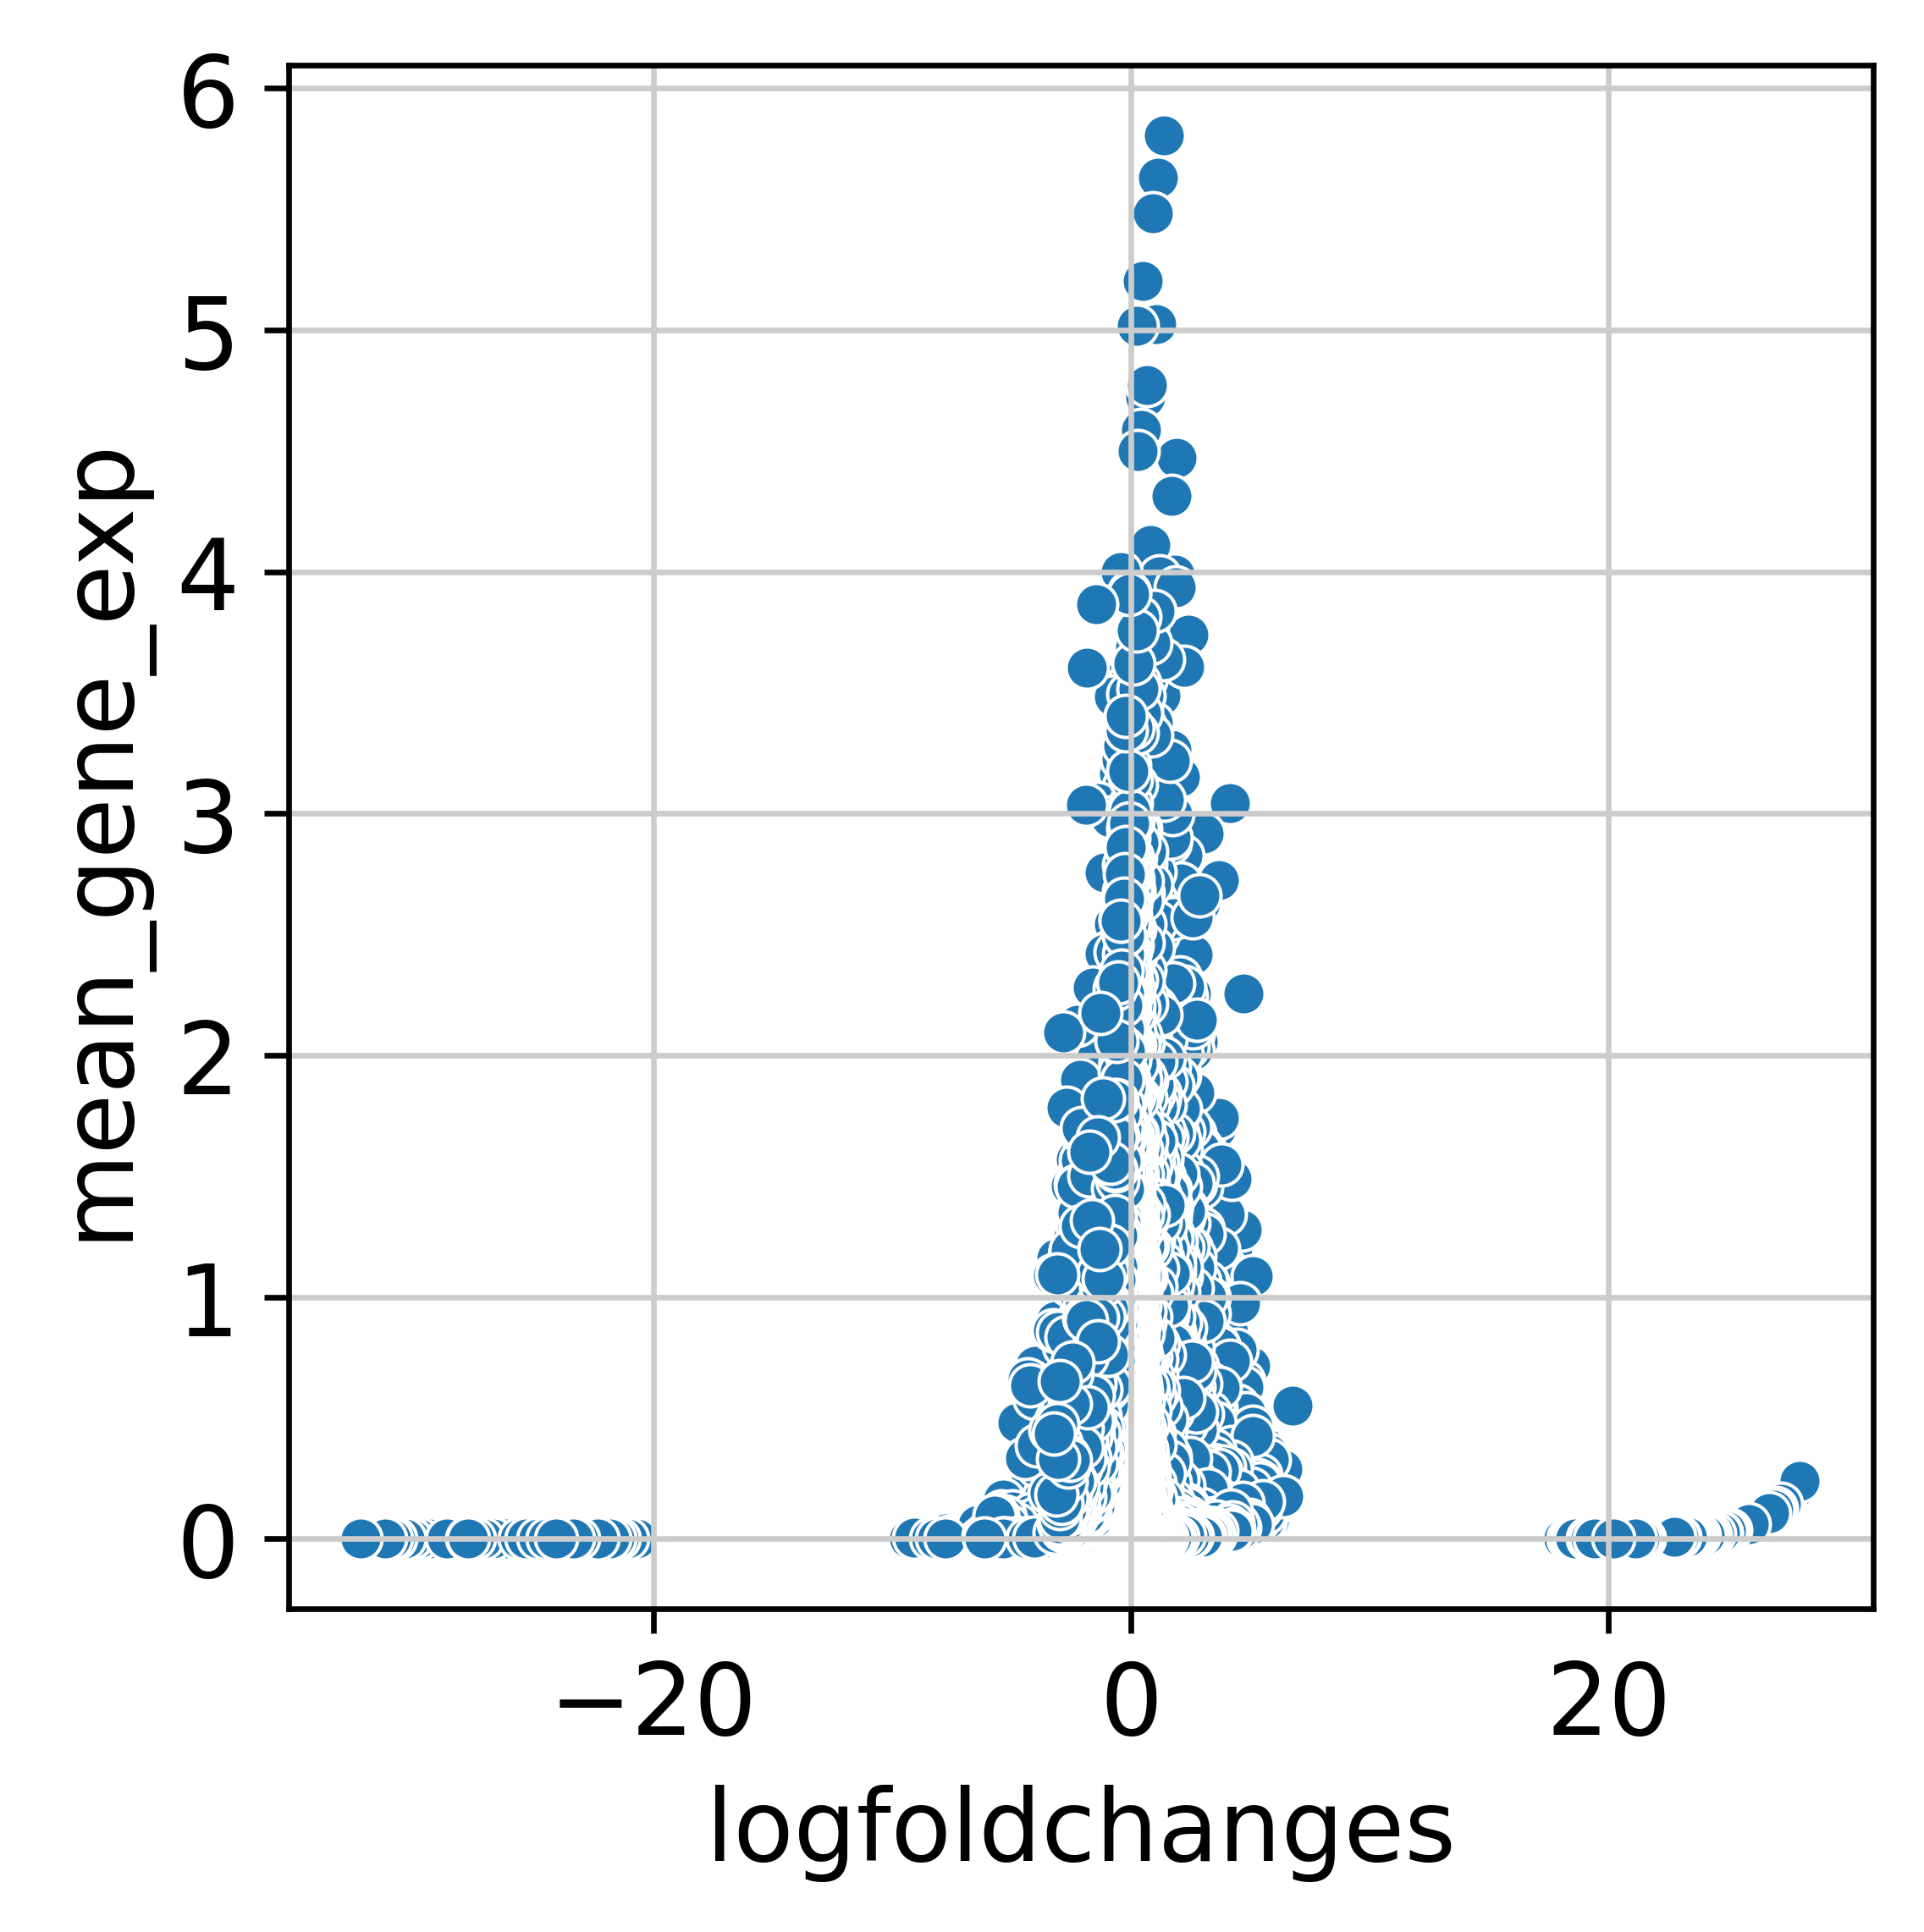

In [16]:
sns.scatterplot(data=diff_res,x='logfoldchanges',y='mean_gene_exp')

In [17]:
diff_logFC_thresh = 0.5
diff_pval_thresh = 0.05
diff_meanexp_thresh = 0.5
fit_pval_thresh = 0.05
fit_amplitude_thresh = 0.5

up_genes = list(set(diff_res[(diff_res['logfoldchanges']>diff_logFC_thresh)&\
                             (diff_res['pvals_adj']<diff_pval_thresh)&\
                             (diff_res['mean_gene_exp']>diff_meanexp_thresh)
                            ]['names']))
print(f'Upregulated gene number: {len(up_genes)}')
fit_genes = list(set(fit_res[(fit_res['fdr']<fit_pval_thresh)&(fit_res['A']>fit_amplitude_thresh)]['gene_name_scRNA-0']))
print(f'Fitted gene number: {len(fit_genes)}')

# take intersection
genes_of_interest = list(set(up_genes).intersection(fit_genes))
print(f'Final gene number: {len(genes_of_interest)}')

Upregulated gene number: 996
Fitted gene number: 2948
Final gene number: 956


In [18]:
# ligands
ligands = list(pd.read_table('/nfs/team205/kk18/data/geneset/HGNC/HGNC_542_Receptor_ligands.txt')['Approved symbol'])
print(len(ligands))
genes_of_interest_ligands = list(set(genes_of_interest).intersection(ligands))
print(len(genes_of_interest_ligands))

396
19


In [19]:
genes_of_interest_ligands

['LGALS1',
 'CFLAR',
 'TNFSF13B',
 'PSAP',
 'SPP1',
 'ICAM1',
 'RGS2',
 'ANXA1',
 'LGALS9',
 'CCL3',
 'ADM',
 'CCL4',
 'APP',
 'CCL4L2',
 'CXCL8',
 'VEGFA',
 'CCL3L1',
 'IL1B',
 'EDA']

# Gene enrichment analysis

In [28]:
import gseapy as gp

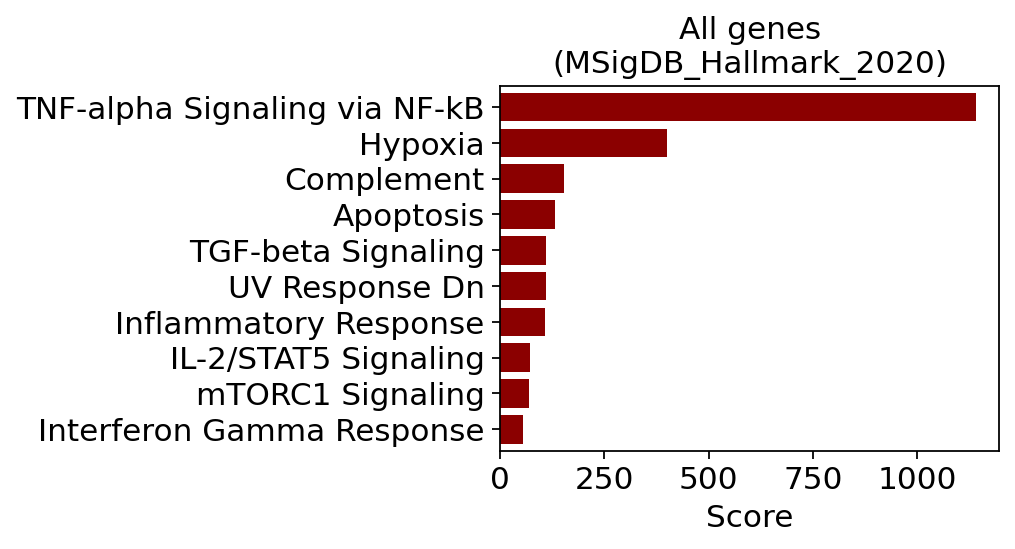

MSigDB_Hallmark_2020


Gene_set                               Term Overlap  \
0   MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB  71/200   
1   MSigDB_Hallmark_2020                            Hypoxia  52/200   
2   MSigDB_Hallmark_2020                         Complement  39/200   
3   MSigDB_Hallmark_2020                          Apoptosis  32/161   
10  MSigDB_Hallmark_2020                 TGF-beta Signaling   14/54   
5   MSigDB_Hallmark_2020                     UV Response Dn  28/144   
4   MSigDB_Hallmark_2020              Inflammatory Response  35/200   
6   MSigDB_Hallmark_2020               IL-2/STAT5 Signaling  31/199   
7   MSigDB_Hallmark_2020                   mTORC1 Signaling  31/200   
8   MSigDB_Hallmark_2020          Interferon Gamma Response  29/200   
9   MSigDB_Hallmark_2020                        p53 Pathway  29/200   
11  MSigDB_Hallmark_2020                     UV Response Up  24/158   
16  MSigDB_Hallmark_2020    Reactive Oxygen Species Pathway   10/49   
14  MSigDB_Hallmark_2020           IL-6/JAK/STAT3 Signaling   15/87   
12  MSigDB_Hallmark_2020                    heme Metabolism  27/200   
13  MSigDB_Hallmark_2020                  KRAS Signaling Up  26/200   
15  MSigDB_Hallmark_2020                  Androgen Response  15/100   
18  MSigDB_Hallmark_2020          Unfolded Protein Response  15/113   
17  MSigDB_Hallmark_2020                         Glycolysis  23/200   
24  MSigDB_Hallmark_2020                     Apical Surface    7/44   
19  MSigDB_Hallmark_2020                Allograft Rejection  21/200   
20  MSigDB_Hallmark_2020                       Adipogenesis  20/200   
21  MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  20/200   
22  MSigDB_Hallmark_2020                    Mitotic Spindle  19/199   
23  MSigDB_Hallmark_2020            Estrogen Response Early  19/200   
26  MSigDB_Hallmark_2020                       Angiogenesis    5/36   
25  MSigDB_Hallmark_2020            Cholesterol Homeostasis    8/74   
30  MSigDB_Hallmark_2020         Wnt-beta Catenin Signaling    5/42   
28  MSigDB_Hallmark_2020                        Coagulation  12/138   
27  MSigDB_Hallmark_2020             Estrogen Response Late  16/200   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0   7.743250e-43      3.871625e-41            0                     0   
1   2.496819e-24      6.242047e-23            0                     0   
2   4.690112e-14      7.816854e-13            0                     0   
3   5.198431e-12      6.498038e-11            0                     0   
10  1.602600e-07      7.284547e-07            0                     0   
5   1.896532e-10      1.580444e-09            0                     0   
4   2.385509e-11      2.385509e-10            0                     0   
6   6.152984e-09      4.347203e-08            0                     0   
7   6.955524e-09      4.347203e-08            0                     0   
8   9.494731e-08      4.747366e-07            0                     0   
9   9.494731e-08      4.747366e-07            0                     0   
11  5.037722e-07      2.099051e-06            0                     0   
16  8.910180e-05      2.499585e-04            0                     0   
14  1.453638e-05      4.845460e-05            0                     0   
12  1.105750e-06      4.252884e-06            0                     0   
13  3.546221e-06      1.266508e-05            0                     0   
15  7.843775e-05      2.451180e-04            0                     0   
18  3.147613e-04      8.283192e-04            0                     0   
17  8.998507e-05      2.499585e-04            0                     0   
24  4.545128e-03      9.090256e-03            0                     0   
19  6.163995e-04      1.540999e-03            0                     0   
20  1.498519e-03      3.405726e-03            0                     0   
21  1.498519e-03      3.405726e-03            0                     0   
22  3.274441e-03      7.118351e-03            0               

KEGG_2021_Human


Gene_set                                               Term  \
50   KEGG_2021_Human                         Osteoclast differentiation   
60   KEGG_2021_Human                                      Legionellosis   
52   KEGG_2021_Human                          Th17 cell differentiation   
53   KEGG_2021_Human                  B cell receptor signaling pathway   
55   KEGG_2021_Human                                      Leishmaniasis   
56   KEGG_2021_Human                Antigen processing and presentation   
64   KEGG_2021_Human                               Renal cell carcinoma   
54   KEGG_2021_Human                               Rheumatoid arthritis   
62   KEGG_2021_Human                           Chronic myeloid leukemia   
59   KEGG_2021_Human                       NF-kappa B signaling pathway   
51   KEGG_2021_Human                          Lipid and atherosclerosis   
58   KEGG_2021_Human                             FoxO signaling pathway   
67   KEGG_2021_Human               Toll-like receptor signaling pathway   
65   KEGG_2021_Human                                      Toxoplasmosis   
61   KEGG_2021_Human                                          Autophagy   
69   KEGG_2021_Human                                     Chagas disease   
68   KEGG_2021_Human                            HIF-1 signaling pathway   
96   KEGG_2021_Human                                        Ferroptosis   
105  KEGG_2021_Human                                             Asthma   
57   KEGG_2021_Human                                       Tuberculosis   
83   KEGG_2021_Human                         Inflammatory bowel disease   
73   KEGG_2021_Human                   Th1 and Th2 cell differentiation   
70   KEGG_2021_Human  Parathyroid hormone synthesis, secretion and a...   
102  KEGG_2021_Human                           Type I diabetes mellitus   
86   KEGG_2021_Human                             Acute myeloid leukemia   
88   KEGG_2021_Human                    Fc epsilon RI signaling pathway   
76   KEGG_2021_Human                                    Prostate cancer   
66   KEGG_2021_Human    Kaposi sarcoma-associated herpesvirus infection   
99   KEGG_2021_Human                                 Endometrial cancer   
71   KEGG_2021_Human                         Estrogen signaling pathway   

    Overlap       P-value  Adjusted P-value  Old P-value  \
50   30/127  2.142879e-13      5.978634e-11            0   
60    17/57  7.064796e-10      1.791889e-08            0   
52   26/107  4.272721e-12      3.973630e-10            0   
53    21/81  1.325083e-10      9.242455e-09            0   
55    20/77  3.515902e-10      1.552624e-08            0   
56    20/78  4.518213e-10      1.552624e-08            0   
64    18/69  2.478102e-09      4.536381e-08            0   
54    22/93  3.320618e-10      1.552624e-08            0   
62    19/76  1.956916e-09      4.199842e-08            0   
59   23/104  5.564959e-10      1.552624e-08            0   
51   38/215  2.427645e-12      3.386565e-10            0   
58   26/131  5.277075e-10      1.552624e-08            0   
67   22/104  3.204833e-09      4.967491e-08            0   
65   23/112  2.601509e-09      4.536381e-08            0   
61   26/137  1.455894e-09      3.384954e-08            0   
69   21/102  1.213591e-08      1.692960e-07            0   
68   22/109  8.070319e-09      1.185063e-07            0   
96    11/41  2.369505e-06      1.406579e-05            0   
105    9/31  9.756828e-06      4.860991e-05            0   
57   31/180  4.966288e-10      1.552624e-08            0   
83    15/65  3.060568e-07      2.511466e-06            0   
73    19/92  5.669091e-08      6.590319e-07            0   
70   21/106  2.482635e-08      3.298358e-07            0   
102   11/43  3.951360e-06      2.080056e-05            0   
86    15/67  4.666149e-07      3.456177e-06            0   
88    15/68  5.724702e-07      4.095364e-06            0   
76    19/97  1.380169e-07      1.388068e-06            0   
66   3

GO_Biological_Process_2023


Gene_set  \
387  GO_Biological_Process_2023   
334  GO_Biological_Process_2023   
337  GO_Biological_Process_2023   
452  GO_Biological_Process_2023   
346  GO_Biological_Process_2023   
347  GO_Biological_Process_2023   
341  GO_Biological_Process_2023   
422  GO_Biological_Process_2023   
366  GO_Biological_Process_2023   
491  GO_Biological_Process_2023   
490  GO_Biological_Process_2023   
611  GO_Biological_Process_2023   
605  GO_Biological_Process_2023   
612  GO_Biological_Process_2023   
610  GO_Biological_Process_2023   
609  GO_Biological_Process_2023   
608  GO_Biological_Process_2023   
606  GO_Biological_Process_2023   
607  GO_Biological_Process_2023   
442  GO_Biological_Process_2023   
362  GO_Biological_Process_2023   
348  GO_Biological_Process_2023   
530  GO_Biological_Process_2023   
417  GO_Biological_Process_2023   
418  GO_Biological_Process_2023   
419  GO_Biological_Process_2023   
420  GO_Biological_Process_2023   
460  GO_Biological_Process_2023   
386  GO_Biological_Process_2023   
437  GO_Biological_Process_2023   

                                                  Term Overlap       P-value  \
387          Histone Lysine Demethylation (GO:0070076)     5/7  4.785061e-06   
334  Antigen Processing And Presentation Of Exogeno...   13/26  3.655736e-11   
337  Antigen Processing And Presentation Of Peptide...   13/28  1.203600e-10   
452  Regulation Of T-helper Cell Differentiation (G...     4/6  7.202504e-05   
346  Positive Regulation Of Cellular Response To Tr...   11/24  3.956501e-09   
347  Positive Regulation Of Transforming Growth Fac...   11/24  3.956501e-09   
341  Antigen Processing And Presentation Of Exogeno...   13/31  5.799057e-10   
422        Endothelial Tube Morphogenesis (GO:0061154)     5/9  2.648634e-05   
366  Positive Regulation Of Transcription From RNA ...    8/17  4.375704e-07   
491  Regulation Of Transcription From RNA Polymeras...     4/7  1.616793e-04   
490  Peroxisome Proliferator Activated Receptor Sig...     4/7  1.616793e-04   
611  Positive Regulation Of CD4-positive, CD25-posi...     3/5  1.012510e-03   
605               Axo-Dendritic Transport (GO:0008088)     3/5  1.012510e-03   
612  Positive Regulation Of Tau-Protein Kinase Acti...     3/5  1.012510e-03   
610       Morphogenesis Of An Endothelium (GO:0003159)     3/5  1.012510e-03   
609  Mitochondrial Protein Catabolic Process (GO:00...     3/5  1.012510e-03   
608      Intracellular Oxygen Homeostasis (GO:0032364)     3/5  1.012510e-03   
606             Cellular Heat Acclimation (GO:0070370)     3/5  1.012510e-03   
607                      Heat Acclimation (GO:0010286)     3/5  1.012510e-03   
442  Regulation Of Inclusion Body Assembly (GO:0090...    5/10  5.088309e-05   
362  Chaperone Cofactor-Dependent Protein Refolding...   10/27  2.382813e-07   
348          Response To Unfolded Protein (GO:0006986)   14/44  8.876083e-09   
530              Glucan Metabolic Process (GO:0044042)     4/8  3.111041e-04   
417  MHC Class II Protein Complex Assembly (GO:0002...    6/14  2.532666e-05   
418      Lipoprotein Biosynthetic Process (GO:0042158)    6/14  2.532666e-05   
419  Peptide Antigen Assembly With MHC Class II Pro...    6/14  2.532666e-05   
420  Positive Regulation Of Transcription From RNA ...    6/14  2.532666e-05   
460  Negative Regulation Of Platelet-Derived Growth...    5/11  8.961013e-05   
386  Fc-epsilon Receptor Signaling Pathway (GO:0038...    8/22  4.646794e-06   
437  Regulation Of Cellular Response To Heat (GO:19...    6/15  4.050409e-05   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
387      3.057870e-04            0                     0   50.057834   
334      2.299458e-08            0                     0   20.181336   
337      5.047098e-08            0                     0   17.488653   
452      2.192117e-03            0                     0   40.004202   
346      7.858861e-07            0                     0   17.040374   
347      7.858861e-07   

Reactome_2022


Gene_set                                               Term  \
4142  Reactome_2022     MET Activates PI3K/AKT Signaling R-HSA-8851907   
4128  Reactome_2022  Role Of LAT2/NTAL/LAB On Calcium Mobilization ...   
4196  Reactome_2022    PTK6 Promotes HIF1A Stabilization R-HSA-8857538   
4115  Reactome_2022  NR1H3 And NR1H2 Regulate Gene Expression Linke...   
4154  Reactome_2022  Signaling By PDGFRA Extracellular Domain Mutan...   
4153  Reactome_2022          MET Activates RAP1 And RAC1 R-HSA-8875555   
4124  Reactome_2022                    Attenuation Phase R-HSA-3371568   
4129  Reactome_2022          Signaling By Erythropoietin R-HSA-9006335   
4160  Reactome_2022  Erythropoietin Activates Phosphoinositide-3-ki...   
4223  Reactome_2022  Post-transcriptional Silencing By Small RNAs R...   
4139  Reactome_2022    Signaling By FLT3 Fusion Proteins R-HSA-9703465   
4285  Reactome_2022                 MET Activates PTPN11 R-HSA-8865999   
4284  Reactome_2022  LRR FLII-interacting Protein 1 (LRRFIP1) Activ...   
4189  Reactome_2022  Competing Endogenous RNAs (ceRNAs) Regulate PT...   
4190  Reactome_2022  Constitutive Signaling By Overexpressed ERBB2 ...   
4121  Reactome_2022   NR1H2 And NR1H3-mediated Signaling R-HSA-9024446   
4103  Reactome_2022                         Immune System R-HSA-168256   
4111  Reactome_2022  Interleukin-4 And Interleukin-13 Signaling R-H...   
4159  Reactome_2022  Signaling By Cytosolic FGFR1 Fusion Mutants R-...   
4173  Reactome_2022             Interleukin-15 Signaling R-HSA-8983432   
4205  Reactome_2022  Regulation Of Gene Expression By Hypoxia-induc...   
4204  Reactome_2022  Regulation Of PTEN mRNA Translation R-HSA-8943723   
4164  Reactome_2022        Regulation Of Signaling By CBL R-HSA-912631   
4144  Reactome_2022            HDMs Demethylate Histones R-HSA-3214842   
4131  Reactome_2022        Interleukin-2 Family Signaling R-HSA-451927   
4132  Reactome_2022  Interleukin-3, Interleukin-5 And GM-CSF Signal...   
4183  Reactome_2022  Signaling By FLT3 ITD And TKD Mutants R-HSA-97...   
4182  Reactome_2022       Signaling By ERBB2 ECD Mutants R-HSA-9665348   
4148  Reactome_2022    Interleukin Receptor SHC Signaling R-HSA-912526   
4147  Reactome_2022            FLT3 Signaling In Disease R-HSA-9682385   

       Overlap       P-value  Adjusted P-value  Old P-value  \
4142       5/6  1.423497e-06      4.740244e-05            0   
4128      8/14  6.147605e-08      3.115975e-06            0   
4196       4/6  7.202504e-05      1.020610e-03            0   
4115     15/36  3.021135e-11      3.095501e-09            0   
4154      6/11  4.411070e-06      1.129913e-04            0   
4153      6/11  4.411070e-06      1.129913e-04            0   
4124     11/26  1.121198e-08      6.788345e-07            0   
4129     10/24  6.316165e-08      3.115975e-06            0   
4160      6/12  8.464444e-06      1.923838e-04            0   
4223       4/7  1.616793e-04      1.758149e-03            0   
4139      8/18  7.545894e-07      2.716522e-05            0   
4285       3/5  1.012510e-03      7.369747e-03            0   
4284       3/5  1.012510e-03      7.369747e-03            0   
4189      5/10  5.088309e-05      7.701849e-04            0   
4190      5/10  5.088309e-05      7.701849e-04            0   
4121     15/46  1.771097e-09      1.241632e-07            0   
4103  205/1943  8.854187e-29      1.179378e-25            0   
4111    26/107  4.272721e-12      6.323627e-10            0   
4159      7/17  7.113144e-06      1.662229e-04            0   
4173      6/14  2.532666e-05      4.751424e-04            0   
4205      5/11  8.961013e-05      1.158842e-03            0   
4204      5/11  8.961013e-05      1.158842e-03            0   
4164      7/18  1.115954e-05      2.397501e-04            0   
4144      9/26  1.876764e-06      5.952023e-05            0   
4131     13/44  8.177735e-08      3.630915e-06            0   
4132     13/44  8.177735e-08      3.630915e-06            0   
4183      6/15 

In [30]:
geneset_list = ['MSigDB_Hallmark_2020','KEGG_2021_Human','GO_Biological_Process_2023','Reactome_2022']
enr = gp.enrichr(gene_list=genes_of_interest, # or "./tests/data/gene_list.txt",
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

geneset = 'MSigDB_Hallmark_2020'
df = enr.results[enr.results['Gene_set'] == geneset]
df = df[df['Adjusted P-value'] < 0.1]
df = df.sort_values('Combined Score',ascending=False)

# plot
n_rank = 10
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = 4,3
plt.barh(width=df[:n_rank]['Combined Score'],
         y=[x.split(' (')[0] for x in df[:n_rank]['Term']],
         color='darkred')
plt.gca().invert_yaxis()
plt.xlabel('Score')
plt.title(f'All genes\n({geneset})')
plt.margins(y=0.02)
plt.savefig(f"{figdir}/MoMP_LYVE1-up-genes_all-genes_pathways.pdf", bbox_inches="tight",dpi=300)
plt.show()

for geneset in geneset_list:
    print(geneset)
    df = enr.results[enr.results['Gene_set'] == geneset]
    display(df.sort_values('Combined Score',ascending=False)[:30])

In [ ]:
df = enr.results[enr.results['Gene_set'] == 'MSigDB_Hallmark_2020']
genes = df.set_index('Term').loc['TNF-alpha Signaling via NF-kB','Genes']
genes = genes.split(';')
genes

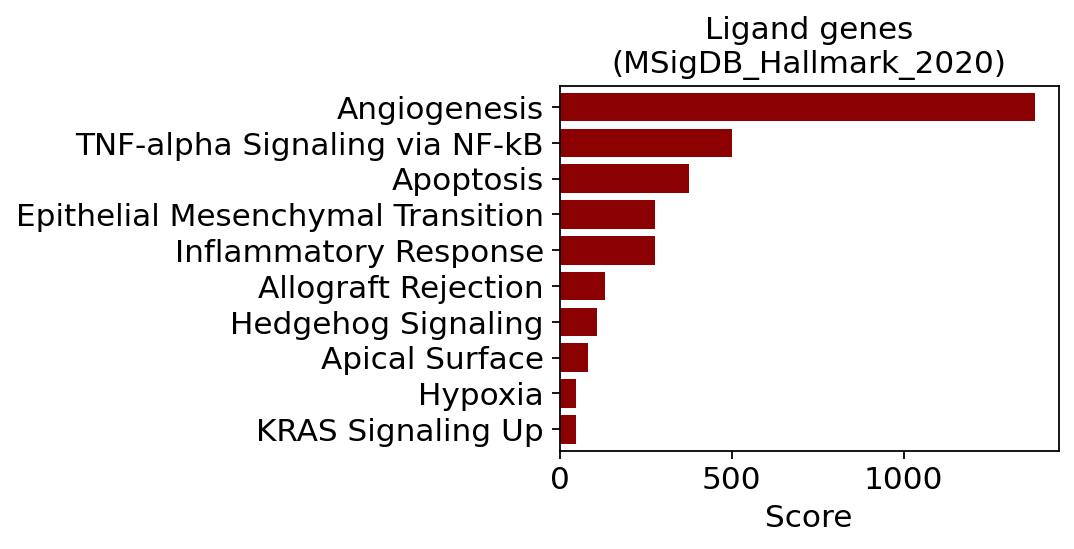

MSigDB_Hallmark_2020


Gene_set                               Term Overlap  \
1   MSigDB_Hallmark_2020                       Angiogenesis    3/36   
0   MSigDB_Hallmark_2020      TNF-alpha Signaling via NF-kB   5/200   
2   MSigDB_Hallmark_2020                          Apoptosis   4/161   
3   MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition   4/200   
4   MSigDB_Hallmark_2020              Inflammatory Response   4/200   
5   MSigDB_Hallmark_2020                Allograft Rejection   3/200   
8   MSigDB_Hallmark_2020                 Hedgehog Signaling    1/36   
9   MSigDB_Hallmark_2020                     Apical Surface    1/44   
6   MSigDB_Hallmark_2020                            Hypoxia   2/200   
7   MSigDB_Hallmark_2020                  KRAS Signaling Up   2/200   
10  MSigDB_Hallmark_2020           IL-6/JAK/STAT3 Signaling    1/87   
11  MSigDB_Hallmark_2020          Unfolded Protein Response   1/113   
12  MSigDB_Hallmark_2020                        Coagulation   1/138   
13  MSigDB_Hallmark_2020              Fatty Acid Metabolism   1/158   
14  MSigDB_Hallmark_2020                     UV Response Up   1/158   
15  MSigDB_Hallmark_2020               IL-2/STAT5 Signaling   1/199   
16  MSigDB_Hallmark_2020                         Glycolysis   1/200   
17  MSigDB_Hallmark_2020                        p53 Pathway   1/200   
18  MSigDB_Hallmark_2020                         Myogenesis   1/200   
19  MSigDB_Hallmark_2020          Interferon Gamma Response   1/200   
20  MSigDB_Hallmark_2020                    Apical Junction   1/200   

         P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
1   5.087618e-06          0.000053            0                     0   
0   9.868468e-07          0.000021            0                     0   
2   1.426870e-05          0.000100            0                     0   
3   3.343536e-05          0.000140            0                     0   
4   3.343536e-05          0.000140            0                     0   
5   8.481702e-04          0.002969            0                     0   
8   3.366628e-02          0.078555            0                     0   
9   4.100046e-02          0.086101            0                     0   
6   1.521445e-02          0.039938            0                     0   
7   1.521445e-02          0.039938            0                     0   
10  7.952676e-02          0.151824            0                     0   
11  1.021055e-01          0.173902            0                     0   
12  1.233202e-01          0.173902            0                     0   
13  1.399491e-01          0.173902            0                     0   
14  1.399491e-01          0.173902            0                     0   
15  1.731089e-01          0.173902            0                     0   
16  1.739024e-01          0.173902            0                     0   
17  1.739024e-01          0.173902            0                     0   
18  1.739024e-01          0.173902            0                     0   
19  1.739024e-01          0.173902            0                     0   
20  1.739024e-01          0.173902            0                     0   

    Odds Ratio  Combined Score                        Genes  
1   113.340909     1381.478426               APP;SPP1;VEGFA  
0    36.238095      501.127597  IL1B;CCL4;CFLAR;ICAM1;VEGFA  
2    33.671338      375.686002         APP;ANXA1;IL1B;CFLAR  
3    26.918367      277.417909      CXCL8;LGALS1;SPP1;VEGFA  
4    26.918367      277.417909         CXCL8;IL1B;ADM;ICAM1  
5    18.829949      133.173484              IL1B;CCL4;ICAM1  
8    31.660317      107.368321                        VEGFA  
9    25.759690       82.280880                          APP  
6    11.754605       49.199013                    ADM;VEGFA  
7    11.754605       49.199013                    IL1B;SPP1  
10   12.852067       32.537087                         IL1B  
11    9.855655       22.488131                        VEGFA  
12    8.047040       16.842223          

KEGG_2021_Human


Gene_set                                               Term  \
21  KEGG_2021_Human                       NF-kappa B signaling pathway   
22  KEGG_2021_Human                               Rheumatoid arthritis   
23  KEGG_2021_Human               Toll-like receptor signaling pathway   
26  KEGG_2021_Human  Viral protein interaction with cytokine and cy...   
27  KEGG_2021_Human                                     Chagas disease   
24  KEGG_2021_Human             Cytokine-cytokine receptor interaction   
25  KEGG_2021_Human                    Human cytomegalovirus infection   
31  KEGG_2021_Human                                            Malaria   
30  KEGG_2021_Human  AGE-RAGE signaling pathway in diabetic complic...   
32  KEGG_2021_Human                      Cytosolic DNA-sensing pathway   
28  KEGG_2021_Human                        Chemokine signaling pathway   
36  KEGG_2021_Human                            African trypanosomiasis   
29  KEGG_2021_Human                          Lipid and atherosclerosis   
37  KEGG_2021_Human                                     Bladder cancer   
33  KEGG_2021_Human                              TNF signaling pathway   
39  KEGG_2021_Human                                      Legionellosis   
34  KEGG_2021_Human             Fluid shear stress and atherosclerosis   
40  KEGG_2021_Human                                          Pertussis   
35  KEGG_2021_Human                                        Influenza A   
41  KEGG_2021_Human                            IL-17 signaling pathway   
38  KEGG_2021_Human    Kaposi sarcoma-associated herpesvirus infection   
42  KEGG_2021_Human                                         Amoebiasis   
54  KEGG_2021_Human                          Graft-versus-host disease   
43  KEGG_2021_Human                                 Yersinia infection   
55  KEGG_2021_Human                           Type I diabetes mellitus   
57  KEGG_2021_Human       Intestinal immune network for IgA production   
58  KEGG_2021_Human                            Sphingolipid metabolism   
44  KEGG_2021_Human                  Non-alcoholic fatty liver disease   
45  KEGG_2021_Human                                        Necroptosis   
46  KEGG_2021_Human                NOD-like receptor signaling pathway   

   Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
21   8/104  2.928035e-14      2.605951e-12            0                     0   
22    7/93  1.797700e-12      7.999767e-11            0                     0   
23   7/104  4.007883e-12      1.189005e-10            0                     0   
26   5/100  3.106736e-08      4.364830e-07            0                     0   
27   5/102  3.433012e-08      4.364830e-07            0                     0   
24   8/295  1.337713e-10      2.976412e-09            0                     0   
25   7/225  9.330382e-10      1.660808e-08            0                     0   
31    3/50  1.384929e-05      1.120533e-04            0                     0   
30   4/100  2.152504e-06      1.915728e-05            0                     0   
32    3/63  2.784174e-05      2.064929e-04            0                     0   
28   5/192  8.067217e-07      8.974779e-06            0                     0   
36    2/37  5.582623e-04      3.105334e-03            0                     0   
29   5/215  1.409319e-06      1.393660e-05            0                     0   
37    2/41  6.857961e-04      3.590344e-03            0                     0   
33   3/112  1.551677e-04      1.062302e-03            0                     0   
39    2/57  1.322766e-03      6.196114e-03            0                     0   
34   3/139  2.933904e-04      1.865125e-03            0                     0   
40    2/76  2.336839e-03      1.039893e-02            0                     0   
35   3/172  5.472743e-04      3.105334e-03            0                     0   
41    2/94  3.547699e-03      1.503549e-02            0                     0   
38   3/193  7.6

GO_Biological_Process_2023


Gene_set  \
148  GO_Biological_Process_2023   
149  GO_Biological_Process_2023   
147  GO_Biological_Process_2023   
110  GO_Biological_Process_2023   
153  GO_Biological_Process_2023   
152  GO_Biological_Process_2023   
156  GO_Biological_Process_2023   
157  GO_Biological_Process_2023   
160  GO_Biological_Process_2023   
159  GO_Biological_Process_2023   
163  GO_Biological_Process_2023   
164  GO_Biological_Process_2023   
166  GO_Biological_Process_2023   
130  GO_Biological_Process_2023   
131  GO_Biological_Process_2023   
169  GO_Biological_Process_2023   
170  GO_Biological_Process_2023   
176  GO_Biological_Process_2023   
114  GO_Biological_Process_2023   
115  GO_Biological_Process_2023   
111  GO_Biological_Process_2023   
177  GO_Biological_Process_2023   
178  GO_Biological_Process_2023   
179  GO_Biological_Process_2023   
119  GO_Biological_Process_2023   
120  GO_Biological_Process_2023   
282  GO_Biological_Process_2023   
269  GO_Biological_Process_2023   
283  GO_Biological_Process_2023   
268  GO_Biological_Process_2023   

                                                  Term Overlap       P-value  \
148  Positive Regulation Of Unsaturated Fatty Acid ...     2/6  1.279582e-05   
149  Regulation Of Cell Adhesion Molecule Productio...     2/6  1.279582e-05   
147  Regulation Of Natural Killer Cell Chemotaxis (...     2/6  1.279582e-05   
110             Response To Interleukin-1 (GO:0070555)    8/85  5.521616e-15   
153  Negative Regulation Of Phospholipase Activity ...     2/7  1.790406e-05   
152  Positive Regulation Of Leukocyte Differentiati...     2/7  1.790406e-05   
156  Positive Regulation Of Monocyte Chemotactic Pr...     2/8  2.385862e-05   
157  Regulation Of RNA Biosynthetic Process (GO:200...     2/8  2.385862e-05   
160   Skeletal Muscle Tissue Regeneration (GO:0043403)     2/9  3.065806e-05   
159                 Granulocyte Migration (GO:0097530)     2/9  3.065806e-05   
163  Regulation Of Dendritic Cell Differentiation (...    2/10  3.830095e-05   
164      Induction Of Positive Chemotaxis (GO:0050930)    2/10  3.830095e-05   
166  Regulation Of Monocyte Chemotactic Protein-1 P...    2/11  4.678584e-05   
130                 Eosinophil Chemotaxis (GO:0048245)    3/24  1.452608e-06   
131                  Eosinophil Migration (GO:0072677)    3/24  1.452608e-06   
169  Positive Regulation Of Viral Entry Into Host C...    2/12  5.611129e-05   
170  Positive Regulation By Symbiont Of Entry Into ...    2/12  5.611129e-05   
176     Regulation Of Leukocyte Migration (GO:0002685)    2/13  6.627587e-05   
114                Granulocyte Chemotaxis (GO:0071621)    5/73  6.296618e-09   
115    Cellular Response To Interleukin-1 (GO:0071347)    5/81  1.069071e-08   
111                 Inflammatory Response (GO:0006954)   8/236  2.255385e-11   
177  Regulation Of Establishment Of Endothelial Bar...    2/16  1.017901e-04   
178  Positive Regulation Of Positive Chemotaxis (GO...    2/16  1.017901e-04   
179  Positive Regulation Of Cell Migration Involved...    2/16  1.017901e-04   
119  Chemokine-Mediated Signaling Pathway (GO:0070098)    4/57  2.225057e-07   
120   Response To Organic Cyclic Compound (GO:0014070)    4/58  2.388443e-07   
282              Response To Testosterone (GO:0033574)     1/5  4.741392e-03   
269  Regulation Of Histone Deacetylase Activity (GO...     1/5  4.741392e-03   
283  Regulation Of Calcidiol 1-Monooxygenase Activi...     1/5  4.741392e-03   
268                  Glycolipid Transport (GO:0046836)     1/5  4.741392e-03   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
148      2.316043e-04            0                     0  587.558824   
149      2.316043e-04            0                     0  587.558824   
147      2.316043e-04            0                     0  587.558824   
110      3.997650e-12            0                     0  187.995277   
153      2.946031e-04            0                     0  470.023529   
152      2.946031e-04   

Reactome_2022


Gene_set                                               Term  \
835  Reactome_2022             Interleukin-10 Signaling R-HSA-6783783   
844  Reactome_2022  Formyl Peptide Receptors Bind Formyl Peptides ...   
841  Reactome_2022   Chemokine Receptors Bind Chemokines R-HSA-380108   
834  Reactome_2022  Cytokine Signaling In Immune System R-HSA-1280215   
836  Reactome_2022             Signaling By Interleukins R-HSA-449147   
839  Reactome_2022  Interleukin-4 And Interleukin-13 Signaling R-H...   
853  Reactome_2022          CLEC7A/inflammasome Pathway R-HSA-5660668   
838  Reactome_2022      Peptide Ligand-Binding Receptors R-HSA-375276   
858  Reactome_2022  VEGF Binds To VEGFR Leading To Receptor Dimeri...   
857  Reactome_2022                        TRAIL Signaling R-HSA-75158   
848  Reactome_2022  TNFs Bind Their Physiological Receptors R-HSA-...   
859  Reactome_2022              Interleukin-1 Processing R-HSA-448706   
861  Reactome_2022      Calcitonin-like Ligand Receptors R-HSA-419812   
864  Reactome_2022          CASP8 Activity Is Inhibited R-HSA-5218900   
863  Reactome_2022           Dimerization Of Procaspase-8 R-HSA-69416   
862  Reactome_2022  Regulation Of Gene Expression By Hypoxia-induc...   
842  Reactome_2022  Class A/1 (Rhodopsin-like Receptors) R-HSA-373076   
865  Reactome_2022  TFAP2 (AP-2) Family Regulates Transcription Of...   
866  Reactome_2022  Advanced Glycosylation Endproduct Receptor Sig...   
840  Reactome_2022                   GPCR Ligand Binding R-HSA-500792   
867  Reactome_2022                    NLRP3 Inflammasome R-HSA-844456   
868  Reactome_2022  Caspase Activation Via Death Receptors In Pres...   
869  Reactome_2022  TNF Receptor Superfamily (TNFSF) Members Media...   
837  Reactome_2022                         Immune System R-HSA-168256   
849  Reactome_2022                   Regulated Necrosis R-HSA-5218859   
871  Reactome_2022   VEGFR2 Mediated Cell Proliferation R-HSA-5218921   
874  Reactome_2022                         Inflammasomes R-HSA-622312   
873  Reactome_2022  Deregulated CDK5 Triggers Neurodegenerative Pa...   
843  Reactome_2022                     Signaling By GPCR R-HSA-372790   
875  Reactome_2022  Insertion Of Tail-Anchored Proteins Into Endop...   

     Overlap       P-value  Adjusted P-value  Old P-value  \
835     6/45  2.433650e-12      9.334281e-11            0   
844      2/8  2.385862e-05      2.450931e-04            0   
841     4/56  2.070153e-07      2.924092e-06            0   
834   12/702  1.281747e-13      1.448374e-11            0   
836   10/453  2.478128e-12      9.334281e-11            0   
839    5/107  4.368910e-08      8.228114e-07            0   
853      1/6  5.687116e-03      3.174831e-02            0   
838    6/196  2.001735e-08      4.523921e-07            0   
858      1/8  7.576012e-03      3.424358e-02            0   
857      1/8  7.576012e-03      3.424358e-02            0   
848     2/29  3.418662e-04      2.575392e-03            0   
859      1/9  8.519186e-03      3.702569e-02            0   
861     1/10  9.461511e-03      3.792057e-02            0   
864     1/11  1.040299e-02      3.792057e-02            0   
863     1/11  1.040299e-02      3.792057e-02            0   
862     1/11  1.040299e-02      3.792057e-02            0   
842    6/327  4.137318e-07      5.194633e-06            0   
865     1/13  1.228340e-02      4.206133e-02            0   
866     1/13  1.228340e-02      4.206133e-02            0   
840    7/458  1.252670e-07      2.022167e-06            0   
867     1/16  1.509767e-02      4.874391e-02            0   
868     1/16  1.509767e-02      4.874391e-02            0   
869     1/17  1.603407e-02      4.921215e-02            0   
837  12/1943  1.797854e-08      4.523921e-07            0   
849     2/57  1.322766e-03      9.342034e-03            0   
871     1/18  1.696963e-02      4.921215e-02            0   
874     1/21  1.977125e-02      5.449150e-02            0   
873     1/21  1.977125e-02      5.4491

In [31]:
# ligands

geneset_list = ['MSigDB_Hallmark_2020','KEGG_2021_Human','GO_Biological_Process_2023','Reactome_2022']
enr = gp.enrichr(gene_list=genes_of_interest_ligands, # or "./tests/data/gene_list.txt",
                 gene_sets=geneset_list,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

geneset = 'MSigDB_Hallmark_2020'
df = enr.results[enr.results['Gene_set'] == geneset]
df = df[df['Adjusted P-value'] < 0.1]
df = df.sort_values('Combined Score',ascending=False)

# plot
n_rank = 10
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = 4,3
plt.barh(width=df[:n_rank]['Combined Score'],
         y=[x.split(' (')[0] for x in df[:n_rank]['Term']],
         color='darkred')
plt.gca().invert_yaxis()
plt.xlabel('Score')
plt.title(f'Ligand genes\n({geneset})')
plt.margins(y=0.02)
plt.savefig(f"{figdir}/MoMP_LYVE1-up-genes_ligands_pathways.pdf", bbox_inches="tight",dpi=300)
plt.show()

for geneset in geneset_list:
    print(geneset)
    df = enr.results[enr.results['Gene_set'] == geneset]
    display(df.sort_values('Combined Score',ascending=False)[:30])

# Plotting gene transition

In [20]:
adata_gex.X.data[:5]

array([1.0841573, 2.6877544, 1.0841573, 2.1779046, 1.0841573],
      dtype=float32)

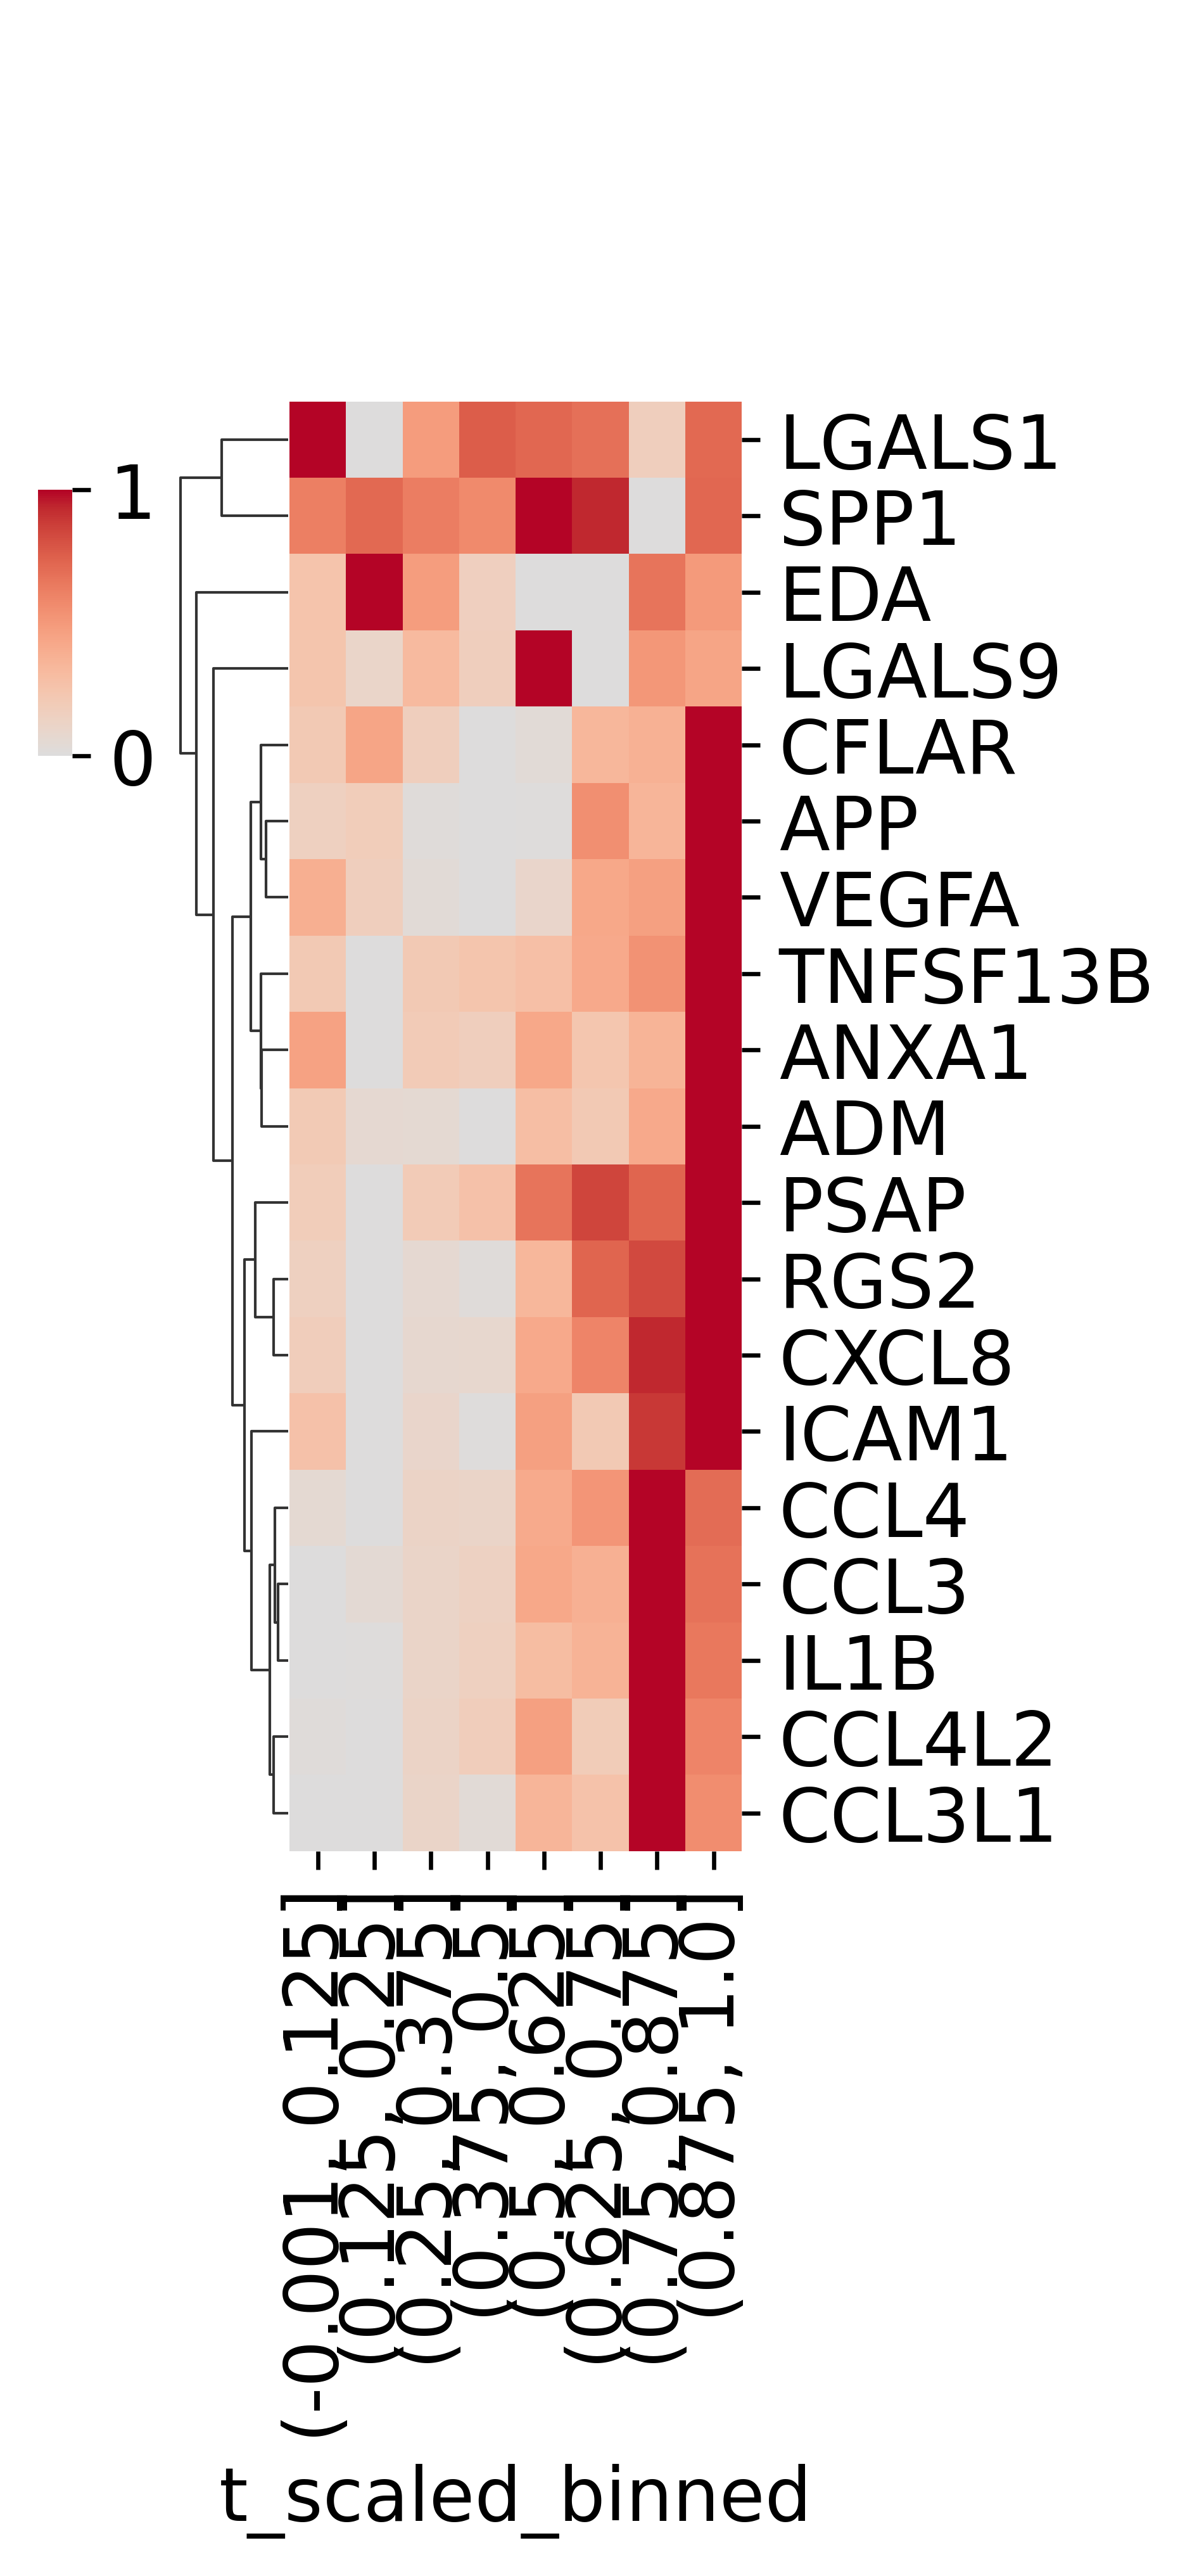

In [36]:
n_pseudotime_bin=8
adata_gex.obs['t_scaled_binned'] = pd.cut(adata_gex.obs['t_scaled'],bins=n_pseudotime_bin)
exp_df = adata_gex[:,genes_of_interest_ligands].to_df()
exp_df['t_scaled_binned'] = adata_gex.obs['t_scaled_binned']
# groupby
exp_df = exp_df.groupby('t_scaled_binned').mean()
# min-max normalise
exp_df = (exp_df-exp_df.min())/(exp_df.max()-exp_df.min())
exp_df = exp_df.T.copy()

plt.rcParams['axes.grid'] = False
g = sns.clustermap(exp_df, col_cluster=False, row_cluster=True,
                   figsize=(3,7),
                  cmap='coolwarm',center=0,
               cbar_pos=(-0.05, 0.7, 0.03, 0.1),
                   xticklabels=True,yticklabels=True)
plt.savefig(f'{figdir}/MP_ligand_genes_heatmap.pdf',bbox_inches="tight",dpi=300)
plt.show()
# get gene order
row_order = g.dendrogram_row.reordered_ind
gene_order = list(exp_df.index[row_order])

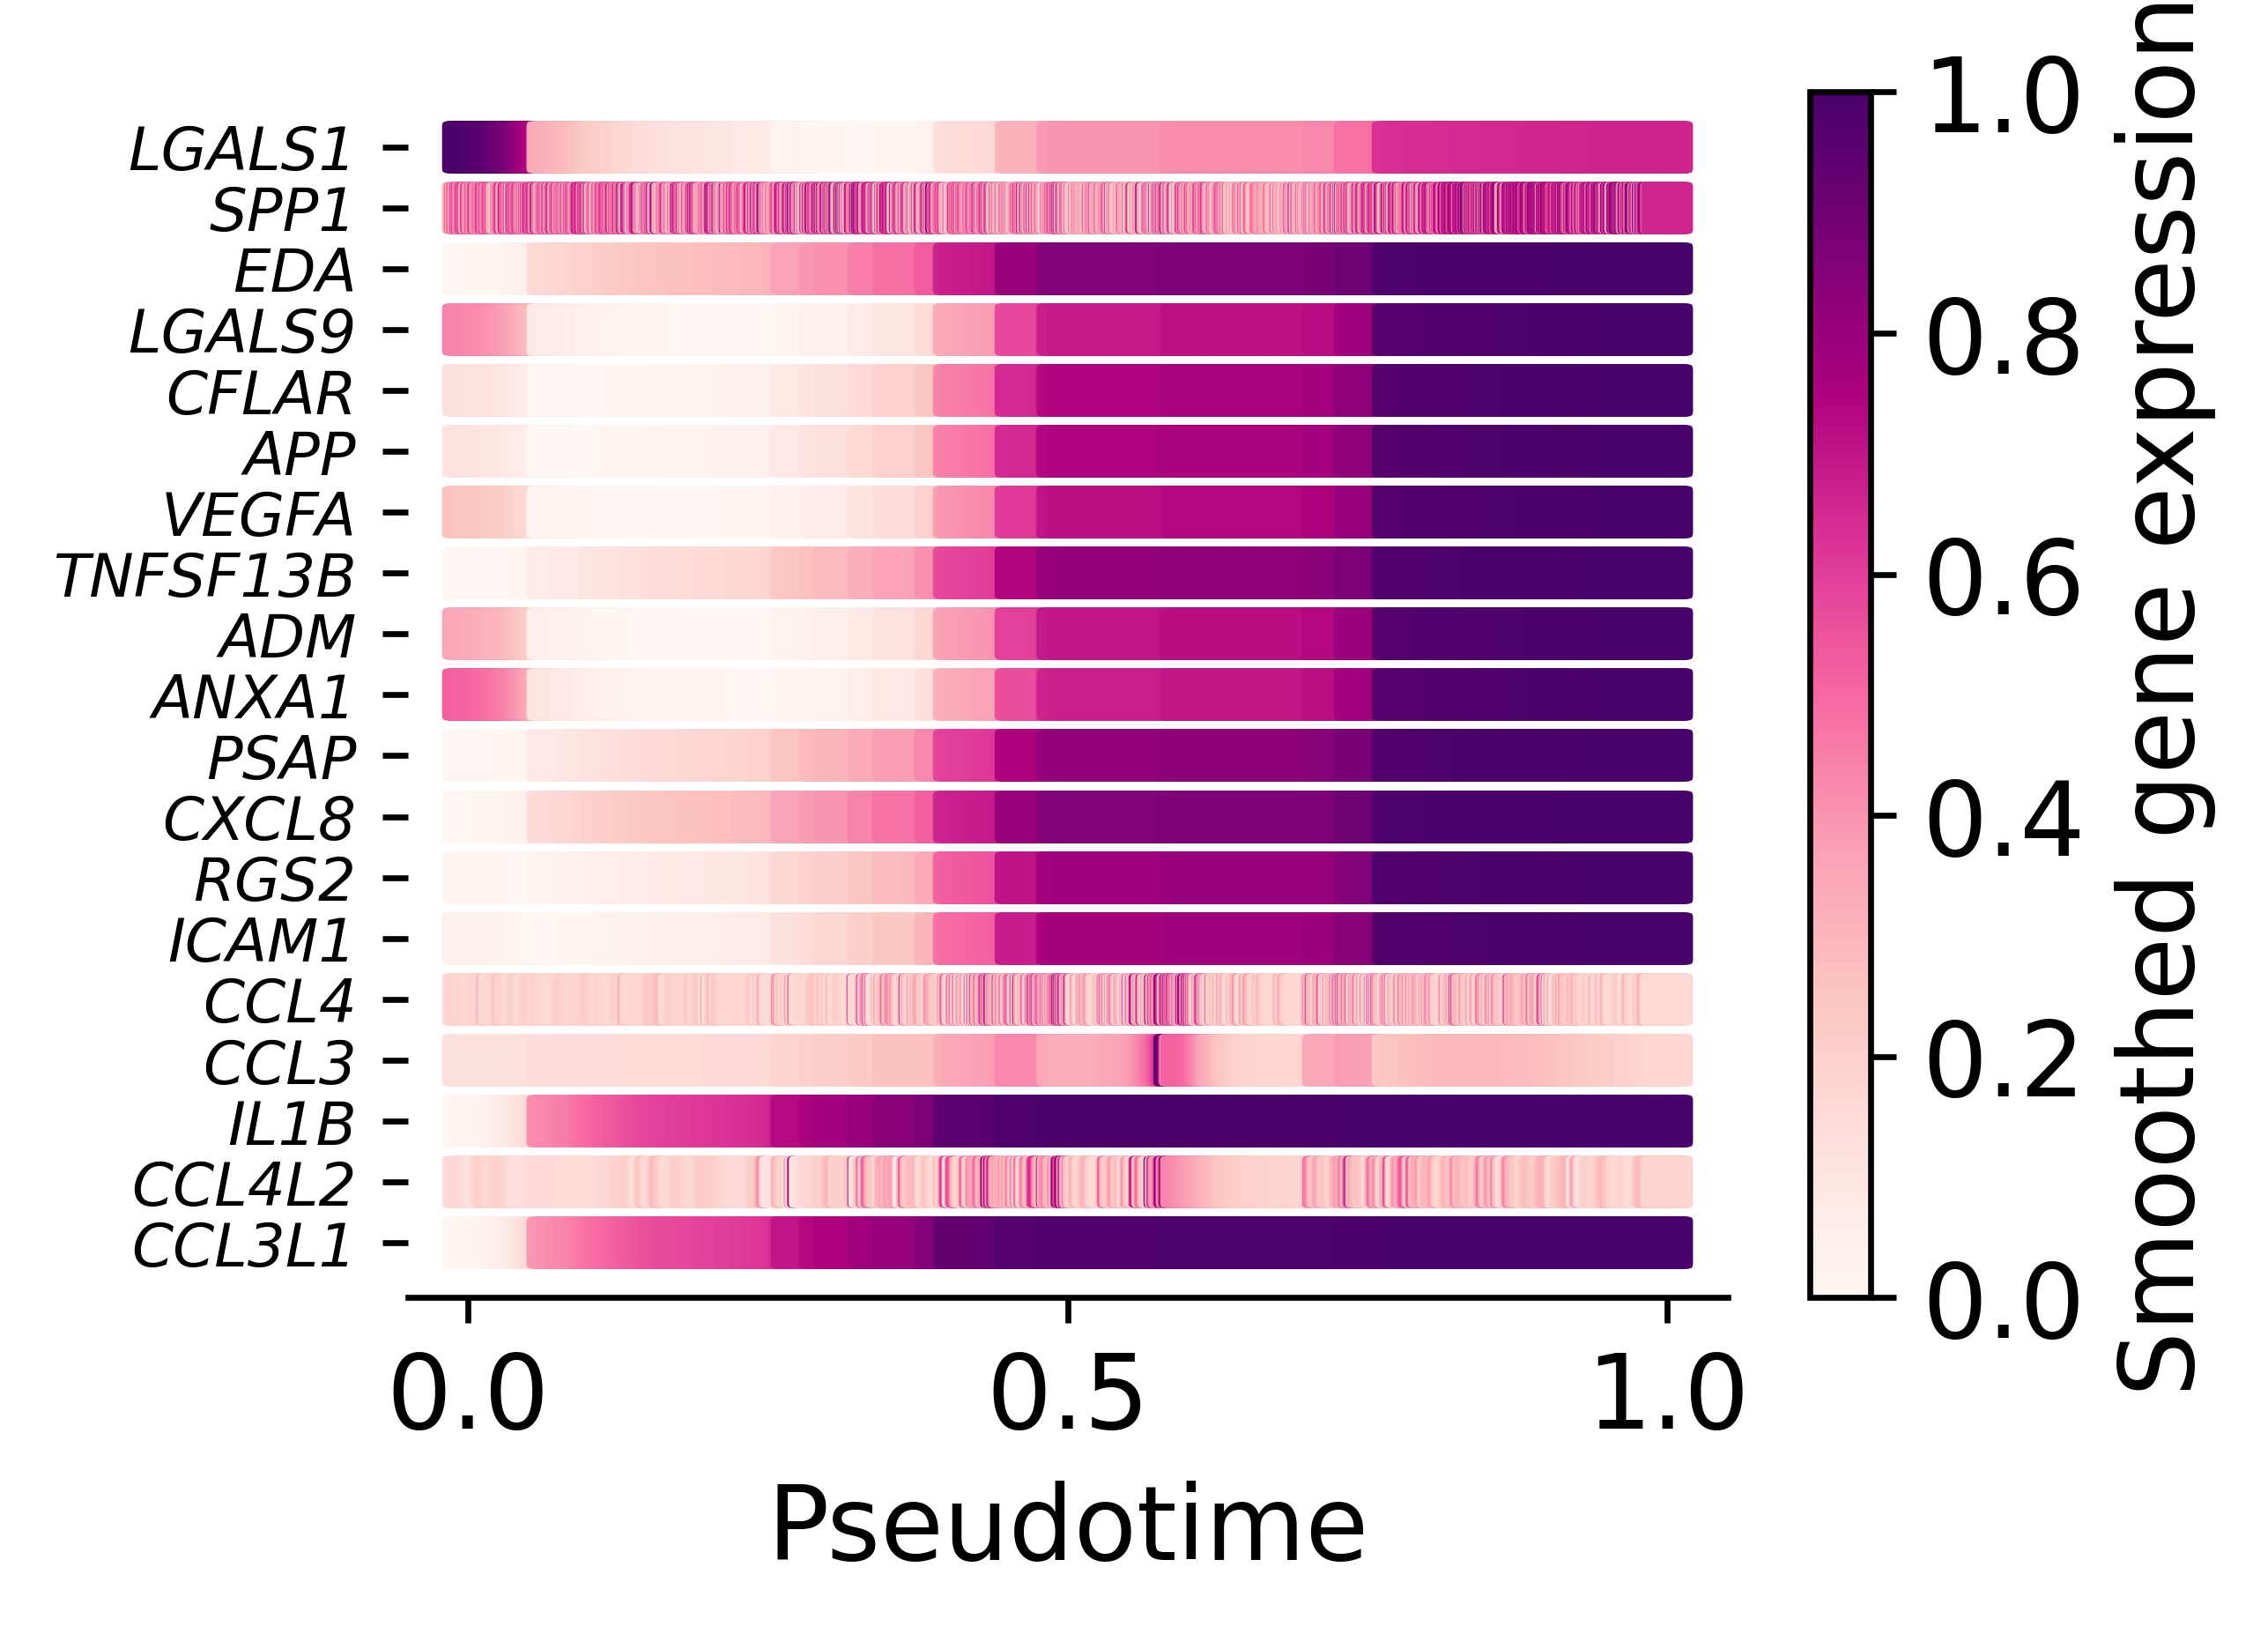

In [109]:
# smoothing expression
from scipy.interpolate import UnivariateSpline

plt.rcParams['axes.grid'] = False
fig, ax = plt.subplots(figsize=(4,3))
cmap = 'RdPu'

adata_df = adata_gex[:,genes_of_interest_ligands].to_df()
adata_df['t_scaled'] = adata_gex.obs['t_scaled'].copy()
adata_df.sort_values('t_scaled',ascending=True,inplace=True)

pseudotime = adata_df['t_scaled'].values  # Convert to numpy array
pseudotime_reshaped = pseudotime.reshape(-1, 1)
pseudotime_plot = np.linspace(min(pseudotime), max(pseudotime), len(pseudotime))
pseudotime_plot_reshaped = pseudotime_plot.reshape(-1, 1)

gene_order_rev = gene_order.copy()
gene_order_rev.reverse()
for i, gene in enumerate(gene_order_rev):
    spl_res = UnivariateSpline(adata_df['t_scaled'], adata_df[gene], k=2)
    gene_smoothed_values = spl_res(adata_df['t_scaled'])
    # min-max normalise
    gene_smoothed_values_norm = (gene_smoothed_values-np.min(gene_smoothed_values))/(np.max(gene_smoothed_values)-np.min(gene_smoothed_values))
    norm = plt.Normalize(gene_smoothed_values_norm.min(), gene_smoothed_values_norm.max())
    sc = plt.scatter(pseudotime_plot, np.ones_like(pseudotime_plot) * (i + 1), 
                     c=gene_smoothed_values_norm, cmap=cmap, norm=norm, marker='s')

plt.colorbar(sc, label='Smoothed gene expression')

# Remove the box around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjust x-axis position
# ax.set_ylim(0.5, len(sorted_genes) + 0.5)

plt.xlabel('Pseudotime')
# plt.ylabel('Gene')
plt.yticks(np.arange(1, len(gene_order_rev) + 1), gene_order_rev, fontsize='xx-small', fontstyle='italic')
# plt.title(title)
# plt.savefig(fname=fname, bbox_inches='tight')
plt.show()

In [108]:
np.min(gene_smoothed_values)

-0.020486605442069778

In [100]:
len(gene_order)

19

In [115]:
pseudotime = adata_df['t_scaled'].values  # Convert to numpy array
pseudotime_reshaped = pseudotime.reshape(-1, 1)
pseudotime_plot = np.linspace(min(pseudotime), max(pseudotime), len(pseudotime))
pseudotime_plot_reshaped = pseudotime_plot.reshape(-1, 1)

nrows = 4
ncols = 6
fig,axs=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,10)) 
for i,gene in enumerate(gene_order):
    spl_res = UnivariateSpline(adata_df['t_scaled'], adata_df[gene], k=2, s=None)
    gene_smoothed_values = spl_res(adata_df['t_scaled'])
    norm = plt.Normalize(gene_smoothed_values.min(), gene_smoothed_values.max())
    
    # plot
    axs[i//ncols,i%ncols].scatter(x=adata_df['t_scaled'],y=adata_df[gene])
    axs[i//ncols,i%ncols].plot(adata_df['t_scaled'],gene_smoothed_values,color='red')
    axs[i//ncols,i%ncols].set_title(gene)
    axs[i//ncols,i%ncols].set_xlabel('pseudotime')
    axs[i//ncols,i%ncols].set_ylabel('smoothed gene expression')
# fig.suptitle('')
fig.tight_layout()

In [ ]:
* associated genes
* associated regions
* espressed genes
* expressed regions